***DATA MINING PROJECT -  DATASET 2***

## Title: Predicting Wildfires in Bejaia Using Data Mining Techniques and Classification

### Introduction:
Wild fires are among the most devastating natural disasters and cause significant material and human losses in the worst circumstances. This is what several states of the country witnessed during previous years espically in Bejaia region where the urban intersects with its dense forests. Addressing this challenge requires proactive measures that harness the power of technology and data-driven approaches.

### Dataset Columns:

- **Date:** Represents the date in the format yyyy-MM-dd, indicating the day of the observation.

- **Temperature:** Indicates the temperature in Celsius, providing information about the atmospheric heat.

- **Rain:** Represents the amount of rainfall in millimeters, measuring the precipitation during a specific period.

- **Wd (Wind Direction):** Specifies the wind direction in degrees (0 to 360), indicating the compass direction from which the wind is blowing.

- **Ws (Wind Speed):** Measures the wind speed in kilometers per hour, indicating how fast the wind is moving.

- **Pres (Air Pressure):** Represents the atmospheric pressure in hectopascals (hPa), providing insights into the weight of the air above.

- **RH (Relative Humidity):** Indicates the relative humidity in percentage, representing the amount of moisture in the air relative to the maximum it could hold at the same temperature.

- **Dew Point Max:** Represents the maximum dew point in Celsius, indicating the temperature at which air becomes saturated with moisture.

- **Dew Point Avg:** Represents the average dew point in Celsius, providing a measure of atmospheric moisture.

- **Dew Point Min:** Represents the minimum dew point in Celsius, indicating the lowest temperature at which the air can hold its moisture.

- **Classes:** Binary classification with values 1 and 0, where 1 represents 'fire' and 0 represents 'not fire.' This column is the target variable for classification tasks, indicating the presence or absence of a fire based on the other recorded environmental parameters.



## ---------------------------------------------------------------------------------


### Part1: Data Preprocessing
it contians 4 phases as it is shown bellow:
#### Phase1: Data Exploration
#### Phase2: Data Cleaning
#### Phase3: Data Vizulisation
#### Phase4: Data Scaling
#### Phase5: Model Selction

### --------------------------------------------------------------------------------

#### Phase 1: Data Exploration
We will extract some useful information about the dataset as **the shape**, **datatypes of attributes**, **null values** and **statistics**

In [206]:
#import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import classification_report,accuracy_score,f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix,roc_curve
from io import StringIO
from six import StringIO
from IPython.display import Image
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#read the dataset and skip the row containing the title
data = pd.read_csv('https://raw.githubusercontent.com/BillalChaouche/DataMiningProject/main/Second%20dataset%20fires%20in%20Bejaia.csv.csv')

In [ ]:
data

date  Temperature  Rain     Wd    Ws    Pres    RH  dew point Max  \
0     2023-06-01         22.3   0.2  158.0   9.2  1013.7  79.6           17.0   
1     2023-06-02         23.4   0.0  157.0   9.1  1012.4  81.2           18.0   
2     2023-06-03         20.8   0.0  237.0   8.7  1014.3  83.4           17.0   
3     2023-06-04         24.0   9.6  270.0   8.7  1013.4  79.8           18.0   
4     2023-06-05         24.3   0.0   97.0   9.1  1014.4  80.0           19.0   
...          ...          ...   ...    ...   ...     ...   ...            ...   
1769  2012-09-26         31.0   0.0    NaN  11.0  1009.4  54.0           23.0   
1770  2012-09-27         31.0   0.0    NaN  11.0  1010.0  66.0           23.0   
1771  2012-09-28         32.0   0.7    NaN  14.0  1007.3  47.0           24.0   
1772  2012-09-29         26.0   1.8    NaN  16.0  1012.8  80.0           20.0   
1773  2012-09-30         25.0   1.4    NaN  14.0  1015.7  78.0           19.0   

      dew point Avg  dew point Min   Classes  
0              15.5           11.0         0  
1              15.9           14.0         0  
2              15.9           14.0         0  
3              16.6           15.0         0  
4              16.4            9.0         0  
...             ...            ...       ...  
1769           20.3           17.0  not fire  
1770           21.0           19.0      fire  
1771           21.5           20.0  not fire  
1772           18.3           16.0  not fire  
1773           17.3           15.0  not fire  

[1774 rows x 11 columns]

In [ ]:
# get number of rows and clomuns
data.shape

(1774, 11)

In [ ]:
# general information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1774 non-null   object 
 1   Temperature    1620 non-null   float64
 2   Rain           1756 non-null   float64
 3   Wd             839 non-null    float64
 4   Ws             1523 non-null   float64
 5   Pres           1041 non-null   float64
 6   RH             1768 non-null   float64
 7   dew point Max  1768 non-null   float64
 8   dew point Avg  1768 non-null   float64
 9   dew point Min  1768 non-null   float64
 10  Classes        1773 non-null   object 
dtypes: float64(9), object(2)
memory usage: 152.6+ KB


In [ ]:
#get the dataypes of attributes
data.dtypes

date              object
Temperature      float64
Rain             float64
Wd               float64
Ws               float64
Pres             float64
RH               float64
dew point Max    float64
dew point Avg    float64
dew point Min    float64
Classes           object
dtype: object

In [ ]:
#show some statistics of the entire dataset
data.describe().T

count         mean        std    min       25%      50%  \
Temperature    1620.0    29.310247   3.659461   18.0    27.000    29.00   
Rain           1756.0     0.723576   3.472815    0.0     0.000     0.00   
Wd              839.0   164.463647  57.657915    3.0   123.000   160.00   
Ws             1523.0    10.959291   3.619786    1.6     8.800    10.50   
Pres           1041.0  1015.184822   3.956927  966.4  1012.900  1015.20   
RH             1768.0    71.259785  10.980185   21.0    66.475    73.55   
dew point Max  1768.0    21.631787   2.878535   10.0    20.000    22.00   
dew point Avg  1768.0    18.659898   3.154930    5.8    16.900    19.20   
dew point Min  1768.0    15.093891   4.035525   -6.0    13.000    16.00   

                  75%     max  
Temperature      31.0    47.0  
Rain              0.0    81.0  
Wd              206.0   358.0  
Ws               13.0    29.0  
Pres           1017.3  1026.8  
RH               78.9    92.1  
dew point Max    24.0    28.0  
dew point Avg    20.8    25.5  
dew point Min    18.0    24.0

In [ ]:
#check null values
null_counts = data.isnull().sum()
null_counts

date               0
Temperature      154
Rain              18
Wd               935
Ws               251
Pres             733
RH                 6
dew point Max      6
dew point Avg      6
dew point Min      6
Classes            1
dtype: int64


We observe a significant number of null values in the **'Wd' (Wind Direction)** column, indicating potential missing data in this attribute. Additionally, there are missing values in other columns such as **'Pres' (Air Pressure)**, **'Temperature', 'Rain,' 'Ws' (Wind Speed)**, The rest of columns have fewer null values. Addressing these null values is crucial for maintaining the completeness and accuracy of the dataset.

In [ ]:
# check columns names
data.columns

Index(['date', 'Temperature', 'Rain', 'Wd', 'Ws', 'Pres', 'RH',
       'dew point Max', 'dew point Avg', 'dew point Min', 'Classes'],
      dtype='object')

In [ ]:
# statisitcs about the target attributes
data['Classes'].describe()

count     1773
unique       4
top          0
freq      1049
Name: Classes, dtype: object

* We can notice from this statistical representation that the unique values of target attribute 'classes' is 4 which is not logical since we know it is a binary classes (fire, not fire) and this can be caused by the datatpye of this attributes which is 'object'.

#### Summary of phase 1
##### Results:
  * The dataset contains 11 columns and 1774 rows
  * The datatype of two columns ('date' and 'Classes') attributes is object, but the good thing is that the rest of
     the columns are in their appropriate datatypes.
  * There is a considerable amount of null values.
  * Some statistical measures show unexpected values due to the datatpye of attributes, Like(number of unique values in binary classes is 4)
#### Notes for the next phase:
  * Null values need to be handled
  * The datatypes should be change to the appropriate ones
  

#### Phase 2: Data Cleaning
In this phase we will **standrize the datatpyes and names of attributes**, **remove noisy points and duplicates**, **handle null values** and **scale data**

* **first**: fix the attributes names


In [ ]:
data.columns

Index(['date', 'Temperature', 'Rain', 'Wd', 'Ws', 'Pres', 'RH',
       'dew point Max', 'dew point Avg', 'dew point Min', 'Classes'],
      dtype='object')

In [ ]:
#make all columns name upperCases
columns_Formatted = [col.upper() for col in data.columns ]
#take the new columns names
data.columns = columns_Formatted
data.columns

Index(['DATE', 'TEMPERATURE', 'RAIN', 'WD', 'WS', 'PRES', 'RH',
       'DEW POINT MAX', 'DEW POINT AVG', 'DEW POINT MIN', 'CLASSES'],
      dtype='object')

* **second**: fix the attributes datatypes

In [ ]:
data['DATE']

0       2023-06-01
1       2023-06-02
2       2023-06-03
3       2023-06-04
4       2023-06-05
           ...    
1769    2012-09-26
1770    2012-09-27
1771    2012-09-28
1772    2012-09-29
1773    2012-09-30
Name: DATE, Length: 1774, dtype: object

The data type of this column is currently listed as 'object,' which typically indicates that it's treated as a generic string rather than a date.



In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract day, month, and year and add them at the first positions
data.insert(0, 'DAY', data['DATE'].dt.day)
data.insert(1, 'MONTH', data['DATE'].dt.month)
data.insert(2, 'YEAR', data['DATE'].dt.year)

# Drop the 'DATE' column
data = data.drop(['DATE'], axis=1)

In [ ]:
data

DAY  MONTH  YEAR  TEMPERATURE  RAIN     WD    WS    PRES    RH  \
0       1      6  2023         22.3   0.2  158.0   9.2  1013.7  79.6   
1       2      6  2023         23.4   0.0  157.0   9.1  1012.4  81.2   
2       3      6  2023         20.8   0.0  237.0   8.7  1014.3  83.4   
3       4      6  2023         24.0   9.6  270.0   8.7  1013.4  79.8   
4       5      6  2023         24.3   0.0   97.0   9.1  1014.4  80.0   
...   ...    ...   ...          ...   ...    ...   ...     ...   ...   
1769   26      9  2012         31.0   0.0    NaN  11.0  1009.4  54.0   
1770   27      9  2012         31.0   0.0    NaN  11.0  1010.0  66.0   
1771   28      9  2012         32.0   0.7    NaN  14.0  1007.3  47.0   
1772   29      9  2012         26.0   1.8    NaN  16.0  1012.8  80.0   
1773   30      9  2012         25.0   1.4    NaN  14.0  1015.7  78.0   

      DEW POINT MAX  DEW POINT AVG  DEW POINT MIN   CLASSES  
0              17.0           15.5           11.0         0  
1              18.0           15.9           14.0         0  
2              17.0           15.9           14.0         0  
3              18.0           16.6           15.0         0  
4              19.0           16.4            9.0         0  
...             ...            ...            ...       ...  
1769           23.0           20.3           17.0  not fire  
1770           23.0           21.0           19.0      fire  
1771           24.0           21.5           20.0  not fire  
1772           20.0           18.3           16.0  not fire  
1773           19.0           17.3           15.0  not fire  

[1774 rows x 13 columns]

In [ ]:
# for target attributes CLASSES should converted to BINARY (1,0)
# check unique values of CLASSES
data['CLASSES'].unique()

array(['0', '1', 'not fire', 'fire', nan], dtype=object)

We notice that some rows are classified with a string and others with intergers 0 or 1. About the 'nan' value we recall that in phase 1, we had 'CLASSES' column having one null value.

In [ ]:
# we need to assign for 'fire' 1 and 'not fire' 0
data['CLASSES'] = data['CLASSES'].replace({'fire': 1, 'not fire': 0})

# Convert 'CLASSES' to numeric values (0 and 1) and fill NaN with a default value
data['CLASSES'] = pd.to_numeric(data['CLASSES'], errors='coerce').fillna(-1)

# Convert 'CLASSES' to integer type
data['CLASSES'] = data['CLASSES'].astype(int)

data['CLASSES'].unique()

#THAT ONE NULL VALUE IS NOW FILLED WITH -1, we will see how to handle it
#Maybe we drop it:
#data = data[data['CLASSES'] != -1]
data.drop(data[data['CLASSES'] == -1].index, inplace=True)
data['CLASSES'].unique()


array([0, 1])

In [ ]:
# check the datatypes
data.dtypes

DAY                int64
MONTH              int64
YEAR               int64
TEMPERATURE      float64
RAIN             float64
WD               float64
WS               float64
PRES             float64
RH               float64
DEW POINT MAX    float64
DEW POINT AVG    float64
DEW POINT MIN    float64
CLASSES            int64
dtype: object

* **third**: detect Duplicates and remove them

In [ ]:
#check dupplicates
print("Total Number of Duplicates:", data.duplicated().sum())

Total Number of Duplicates: 0


* **fourth**: handle null values

In [ ]:
#identify number of null values in each attribute
null_counts = data.isnull().sum()
null_counts

DAY                0
MONTH              0
YEAR               0
TEMPERATURE      154
RAIN              18
WD               934
WS               251
PRES             733
RH                 6
DEW POINT MAX      6
DEW POINT AVG      6
DEW POINT MIN      6
CLASSES            0
dtype: int64

Upon inspection, it is evident that certain attributes contain a significant number of null values. The presence of these missing values could potentially impact the performance and accuracy of our model. To address this concern, we need to assess the extent of null values by examining the percentage of missing data in each attribute

In [ ]:
# Calculate the percentage of null values in each attribute
total_rows = len(data)
null_percentages = (null_counts/total_rows) * 100
null_percentages

DAY               0.000000
MONTH             0.000000
YEAR              0.000000
TEMPERATURE       8.685843
RAIN              1.015228
WD               52.679075
WS               14.156796
PRES             41.342358
RH                0.338409
DEW POINT MAX     0.338409
DEW POINT AVG     0.338409
DEW POINT MIN     0.338409
CLASSES           0.000000
dtype: float64

We will delete the attributes that have more than 50% of null values and as it is shown it is only WD

In [ ]:
# Identify attributes with more than 50% null values
attributes_to_drop = null_percentages[null_percentages > 50].index
# Drop the identified attributes from the DataFrame
data = data.drop(attributes_to_drop, axis=1)
data.head()

DAY  MONTH  YEAR  TEMPERATURE  RAIN   WS    PRES    RH  DEW POINT MAX  \
0    1      6  2023         22.3   0.2  9.2  1013.7  79.6           17.0   
1    2      6  2023         23.4   0.0  9.1  1012.4  81.2           18.0   
2    3      6  2023         20.8   0.0  8.7  1014.3  83.4           17.0   
3    4      6  2023         24.0   9.6  8.7  1013.4  79.8           18.0   
4    5      6  2023         24.3   0.0  9.1  1014.4  80.0           19.0   

   DEW POINT AVG  DEW POINT MIN  CLASSES  
0           15.5           11.0        0  
1           15.9           14.0        0  
2           15.9           14.0        0  
3           16.6           15.0        0  
4           16.4            9.0        0

In [ ]:
null_counts = data.isnull().sum()
null_counts

DAY                0
MONTH              0
YEAR               0
TEMPERATURE      154
RAIN              18
WS               251
PRES             733
RH                 6
DEW POINT MAX      6
DEW POINT AVG      6
DEW POINT MIN      6
CLASSES            0
dtype: int64

* Now we will fill the null values using imputation
* For all Attributes we will use the the average(mean) for each month
*  Given the seasonal patterns inherent in all our attributes, we have chosen to fill the null values with the average (mean) for each respective month. This strategy ensures a central and accurate representation, capturing the essence of the data's periodic fluctuations

In [ ]:
# this subset to verfiy the handling of null values
subset_data = data.loc[460:490]
subset_data

DAY  MONTH  YEAR  TEMPERATURE  RAIN    WS    PRES    RH  DEW POINT MAX  \
460    2      6  2020          NaN   0.0   NaN     NaN  79.0           18.0   
461    3      6  2020         25.0   0.0   9.1  1009.8  71.5           20.0   
462    4      6  2020         31.6   0.0  16.9  1005.2  60.0           17.0   
463    5      6  2020         26.0   5.1  11.8  1011.1  72.5           18.0   
464    6      6  2020         25.0   0.0   9.0  1011.9  76.8           20.0   
465    7      6  2020         29.0   0.0  13.8     NaN  61.2           18.0   
466    8      6  2020         25.0   0.0   6.9  1011.7  79.0           18.0   
467    9      6  2020         24.0   7.1   7.9  1015.7  79.8           20.0   
468   10      6  2020          NaN   0.0   NaN     NaN  73.5           17.0   
469   11      6  2020         25.5   0.0  11.5     NaN  66.9           17.0   
470   12      6  2020         26.7   0.0  10.9     NaN  61.8           17.0   
471   13      6  2020         26.0   3.0  10.7  1014.8  71.2           17.0   
472   14      6  2020         24.6   0.0   9.9  1018.9  66.8           17.0   
473   15      6  2020         26.0   0.0  12.0  1020.4  65.0           17.0   
474   16      6  2020         28.7   0.0   9.5  1017.2  61.0           18.0   
475   17      6  2020         26.0   0.0   9.9  1015.7  69.8           19.0   
476   18      6  2020         25.0   0.0   8.6     NaN  75.0           20.0   
477   19      6  2020         27.0   0.0   NaN  1015.9  76.0           20.0   
478   20      6  2020         26.1   0.0   9.1  1021.1  71.6           19.0   
479   21      6  2020         27.1   0.0  10.6  1020.5  69.9           20.0   
480   22      6  2020          NaN   0.0   NaN     NaN  64.3           18.0   
481   23      6  2020         26.0   0.0   9.7  1017.8  74.6           20.0   
482   24      6  2020         28.6   0.0   9.9  1014.3  74.8           22.0   
483   25      6  2020         27.3   0.0   8.5  1013.4  76.2           23.0   
484   26      6  2020         28.1   0.0   9.7  1012.9  79.6           22.0   
485   27      6  2020         28.0   2.0   8.9  1015.2  77.5           22.0   
486   28      6  2020         26.5   0.0   9.4  1016.5  78.3           21.0   
487   29      6  2020         27.0   0.0   9.6  1015.7  80.0           22.0   
488   30      6  2020         28.0   0.0   9.4  1012.5  78.4           23.0   
489    1      7  2020         29.5   0.0  13.2  1011.2  67.4           23.0   
490    2      7  2020          NaN   0.0   NaN     NaN  71.7           22.0   

     DEW POINT AVG  DEW POINT MIN  CLASSES  
460           15.8           11.0        0  
461           15.8           13.0        0  
462           13.8           10.0        1  
463           15.7           13.0        0  
464           15.9           13.0        0  
465           15.2           13.0        1  
466           16.3           14.0        0  
467           15.7           13.0        0  
468           14.3           11.0        1  
469           14.1            9.0        1  
470           13.5            9.0        0  
471           14.8           11.0        0  
472           12.9            9.0        0  
473           13.1           10.0        1  
474           13.1           10.0        0  
475           15.0           11.0        0  
476           16.6           13.0        0  
477           17.6           10.0        0  
478           16.2           13.0        1  
479           16.1           12.0        1  
480           15.2           13.0        1  
481           16.8           12.0        0  
482           18.2           15.0        0  
483           19.2           14.0        0  
484           20.7           18.0        0  
485           20.1           17.0        0  
486           18.9           16.0        1  
487           19.5           17.0        0  
488           20.1           17.0        1  
489           19.5           12.0        1  
490           19.8           14.0        1

In [ ]:
data['TEMPERATURE'] = data.groupby(['MONTH', 'YEAR'])['TEMPERATURE'].transform(lambda x: x.fillna(x.mean()))
data['RAIN'] = data.groupby(['MONTH', 'YEAR'])['RAIN'].transform(lambda x: x.fillna(x.mean()))
data['WS'] = data.groupby(['MONTH', 'YEAR'])['WS'].transform(lambda x: x.fillna(x.mean()))
data['RH'] = data.groupby(['MONTH', 'YEAR'])['RH'].transform(lambda x: x.fillna(x.mean()))
data['PRES'] = data.groupby(['MONTH', 'YEAR'])['PRES'].transform(lambda x: x.fillna(x.mean()))
data['DEW POINT AVG'] = data.groupby(['MONTH', 'YEAR'])['DEW POINT AVG'].transform(lambda x: x.fillna(x.mean()))
data['DEW POINT MIN'] = data.groupby(['MONTH', 'YEAR'])['DEW POINT MIN'].transform(lambda x: x.fillna(x.mean()))
data['DEW POINT MAX'] = data.groupby(['MONTH', 'YEAR'])['DEW POINT MAX'].transform(lambda x: x.fillna(x.mean()))


In [ ]:
subset_data = data.loc[460:490]
subset_data.head()


DAY  MONTH  YEAR  TEMPERATURE  RAIN         WS         PRES    RH  \
460    2      6  2020    26.696296   0.0  10.084615  1014.808696  79.0   
461    3      6  2020    25.000000   0.0   9.100000  1009.800000  71.5   
462    4      6  2020    31.600000   0.0  16.900000  1005.200000  60.0   
463    5      6  2020    26.000000   5.1  11.800000  1011.100000  72.5   
464    6      6  2020    25.000000   0.0   9.000000  1011.900000  76.8   

     DEW POINT MAX  DEW POINT AVG  DEW POINT MIN  CLASSES  
460           18.0           15.8           11.0        0  
461           20.0           15.8           13.0        0  
462           17.0           13.8           10.0        1  
463           18.0           15.7           13.0        0  
464           20.0           15.9           13.0        0

In [ ]:
null_counts = data.isnull().sum()
null_counts

DAY                0
MONTH              0
YEAR               0
TEMPERATURE        0
RAIN               0
WS                 0
PRES             214
RH                 0
DEW POINT MAX      0
DEW POINT AVG      0
DEW POINT MIN      0
CLASSES            0
dtype: int64

* As it is shown still there is 214 null values in PRES attributes and this is because there are some months with no data record about the air pressure(PRES)
* We will fill the rest of null values with the mean of all records

In [ ]:
# Fill null values in PRES with the mean of the column
mean_pres = data['PRES'].mean()
data['PRES'].fillna(mean_pres, inplace=True)

In [ ]:
null_counts = data.isnull().sum()
null_counts

DAY              0
MONTH            0
YEAR             0
TEMPERATURE      0
RAIN             0
WS               0
PRES             0
RH               0
DEW POINT MAX    0
DEW POINT AVG    0
DEW POINT MIN    0
CLASSES          0
dtype: int64

* **fifth**: detect outilers and remove them

### Visualization

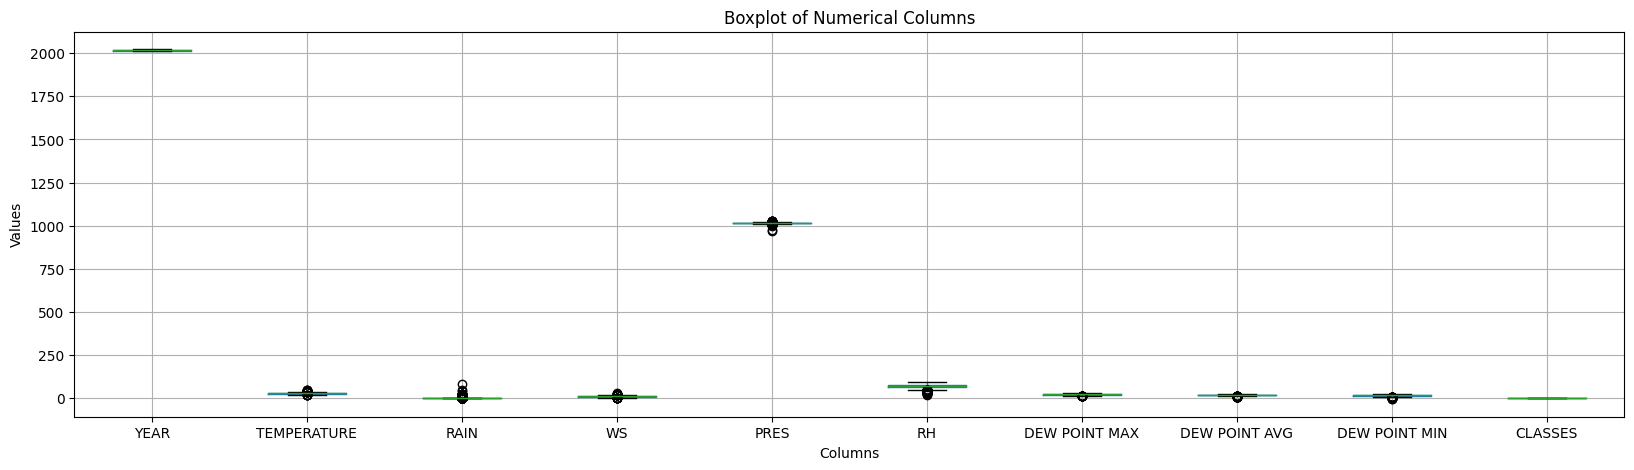

In [ ]:
# visulize the data of each column using boxplots to detect outliers
#Sarra
from matplotlib import pyplot as plt


plt.figure(figsize=(20, 5))
data2 = data.drop(['YEAR'], axis=1)
data2 = data.drop(['MONTH'], axis=1)
data2 = data2.drop(['DAY'], axis=1)
data2.boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

Understanding the distribution of Target Variable "Classes"

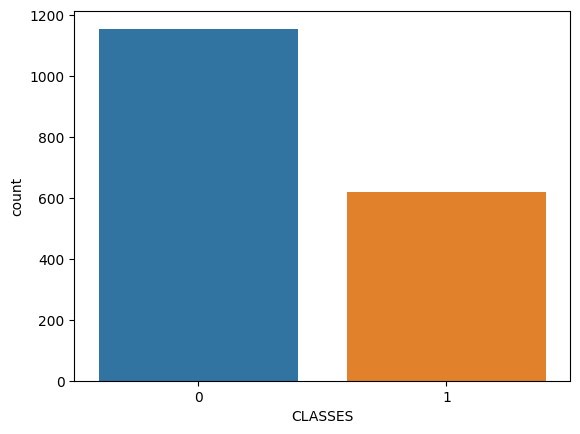

In [ ]:
sns.countplot(x='CLASSES', data=data)
#Adding annotations
class_distribution = data['CLASSES'].value_counts()

In [ ]:
class_0_count = class_distribution[0]
class_1_count = class_distribution[1]
#class_minus_1_count = class_distribution[-1]

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)
#print("Class -1 count:", class_minus_1_count)

Class 0 count: 1155
Class 1 count: 618


**interpretation :**

The class distribution analysis reveals that the dataset contains 1155 instances of no fire (Class 0) and 618 instances of fire (Class 1). This indicates an imbalance, with significantly more instances of no fire than fire events. Understanding this class imbalance is crucial for building accurate predictive models.

When training a prediction system on imbalanced data, there is a risk that the model may become biased toward predicting the majority class (no fire) due to the higher number of instances. In the case of fire prediction, it's essential to consider techniques for handling class imbalance to ensure the model's effectiveness in predicting both fire and non-fire scenarios in the dataset.

In summary, while the class imbalance is significant and requires attention, the small size of the dataset poses additional challenges. Strategies to mitigate class imbalance should be employed to build a robust model that performs well across both fire and non-fire scenarios in the Bejaia dataset.

In [ ]:
X = data.drop(columns=['CLASSES'])
y = data['CLASSES']

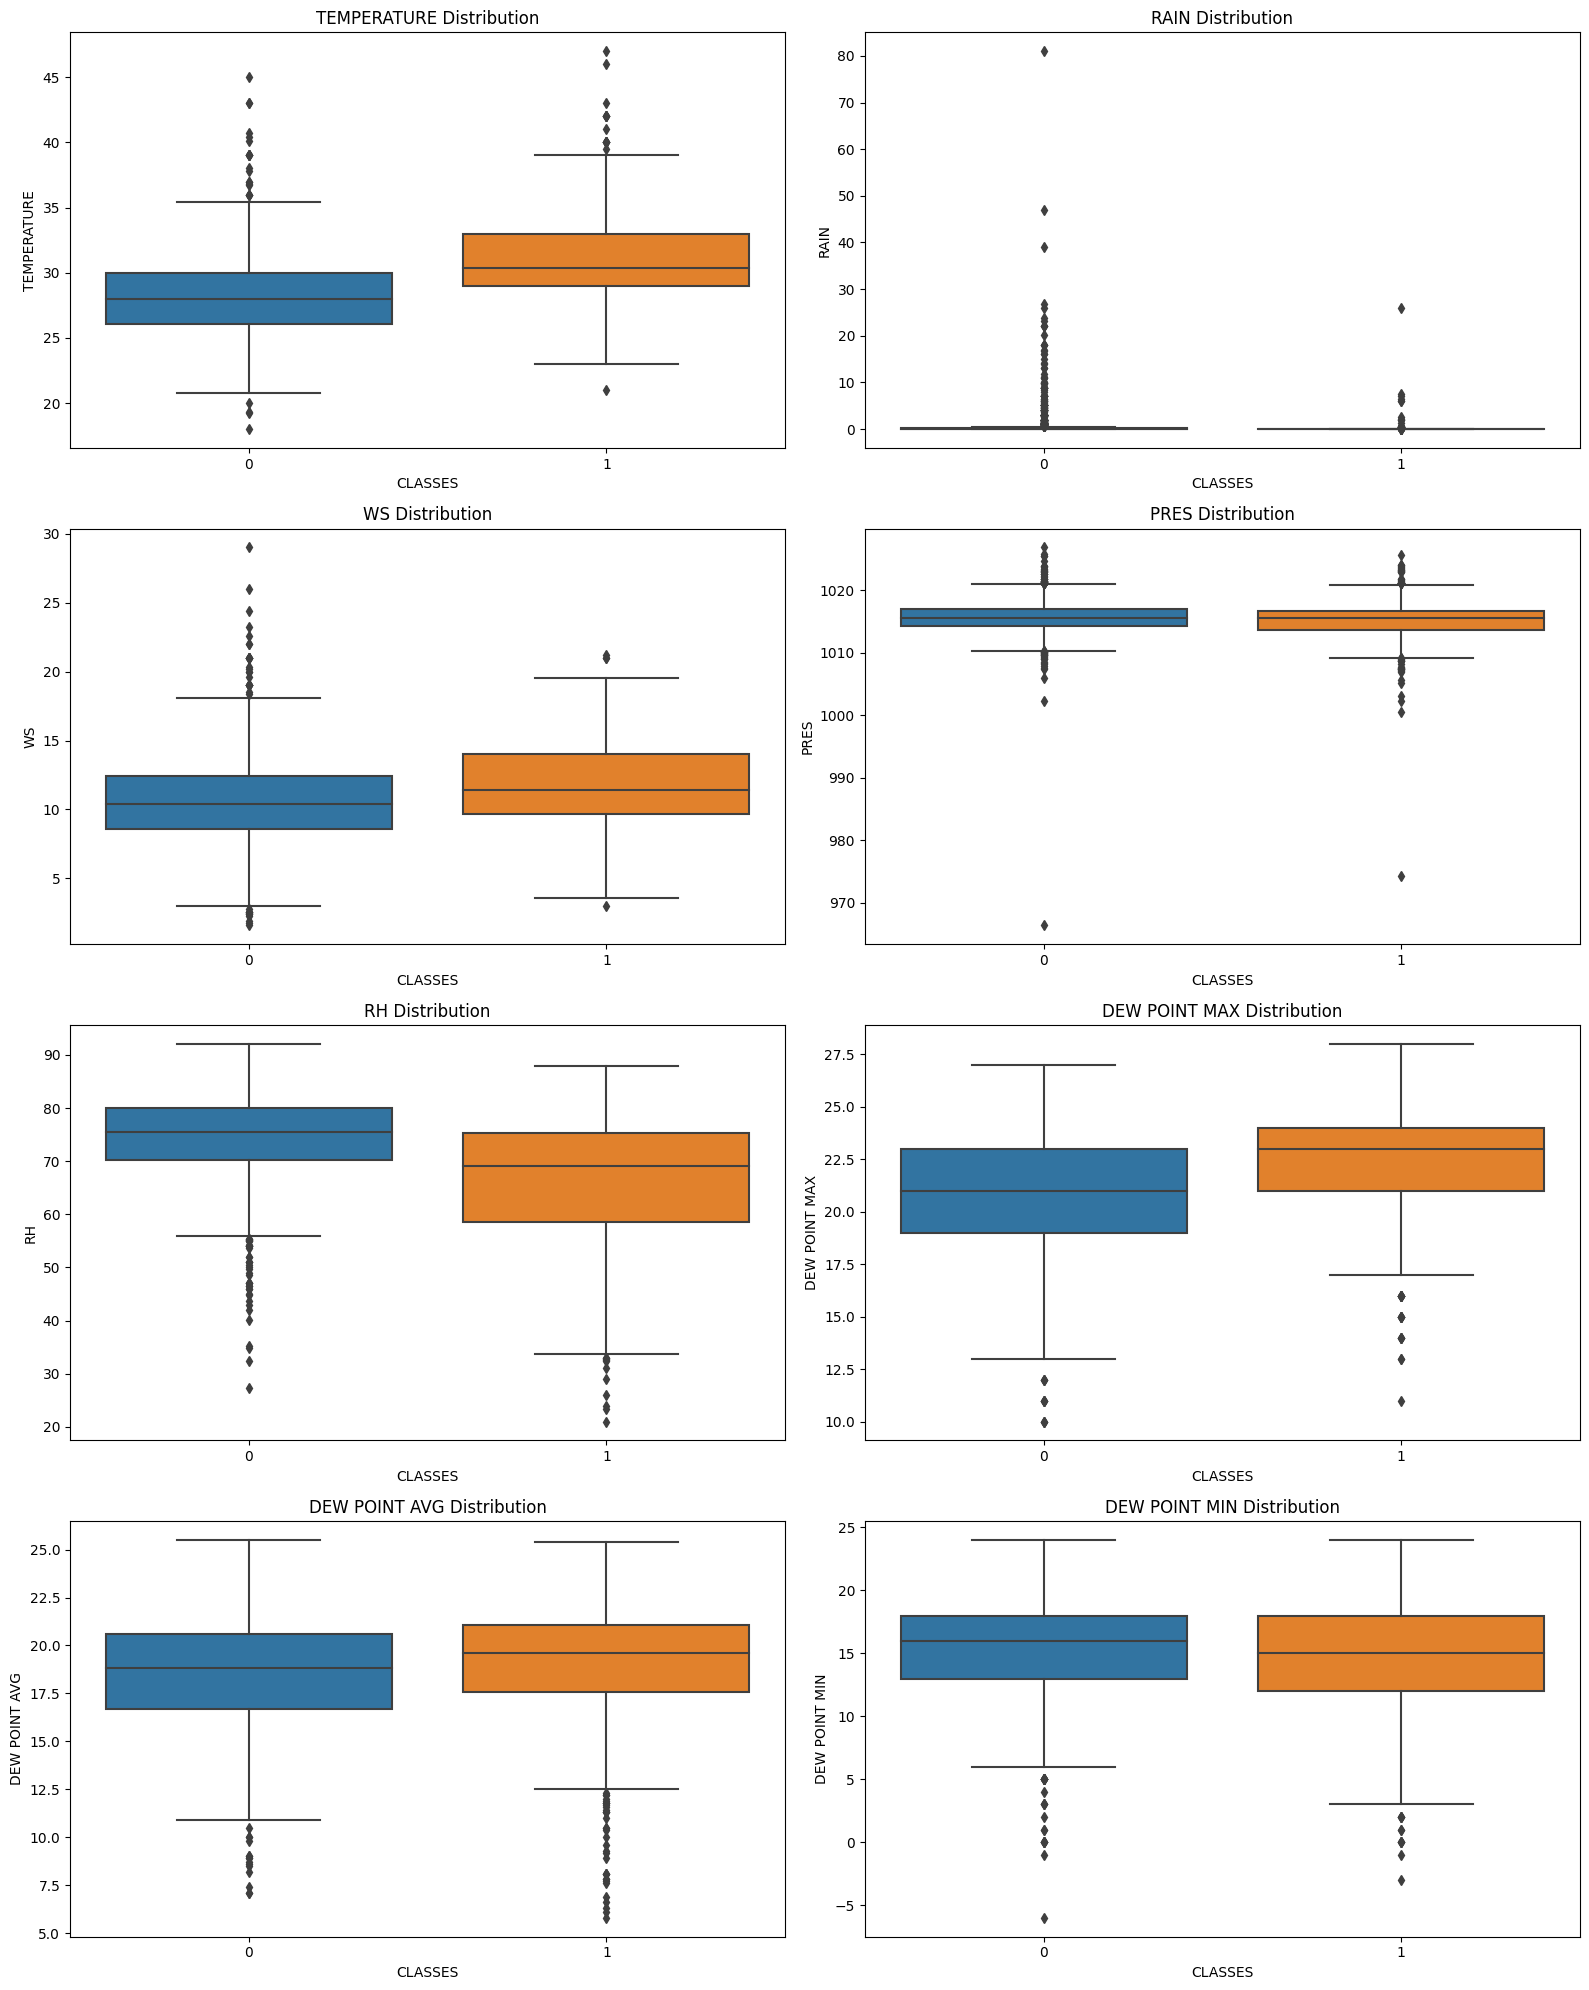

In [ ]:
columns_to_plot = ['TEMPERATURE', 'RAIN', 'WS', 'PRES', 'RH', 'DEW POINT MAX', 'DEW POINT AVG', 'DEW POINT MIN']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    sns.boxplot(x=y, y=column, data=X, ax=axes[row, col])
    axes[row, col].set_title(f'{column} Distribution')




plt.tight_layout()
plt.show()

**interpretation:**
The box plots provide a detailed view of the distribution of weather-related variables concerning fire incidents in the Bejaia region. Let's interpret each box plot:

1. **Temperature Distribution :**
   - The box plot reveals a considerable number of outliers in the temperature distribution for both fire and non-fire scenarios.
   - The presence of many outliers suggests that there are instances where the temperature deviates significantly from the typical or expected values. Outliers in temperature might be caused by various factors such as extreme weather events, measurement errors, or unique environmental conditions.

2. **Relative Humidity Distribution :**
  - The box plot illustrates the Relative Humidity (RH) Distribution with outliers, particularly in the lower range.
  - Outliers in the lower range of relative humidity suggest instances of unusually low humidity levels that deviate from the typical or expected values. These low humidity conditions may have specific implications for the environment, especially in the context of fire risk.
  - Relative humidity is a critical factor in fire behavior, and low humidity levels can contribute to drier conditions, making vegetation more susceptible to ignition and fires more challenging to control.

3. **Wind Speed Distribution :**
   - many outliers are noticeable in the wind speed distribution for both fire and non-fire scenarios.
   - The presence of numerous outliers in wind speed suggests that there are instances of exceptionally high or low wind speeds that deviate from the typical or expected range.
   - Outliers in wind speed can have significant implications for fire behavior. High wind speeds can accelerate the spread of fires, making them more challenging to control, while very low wind speeds might have distinct effects on fire dynamics.

4. **Rain Distribution :**
   - The box plot indicates a Rain Distribution with only outliers, suggesting that the majority of rain values fall outside the typical or expected range.
   - In the context of rainfall, outliers can represent unusually high or low precipitation levels that deviate significantly from the norm. These extreme rainfall events might have distinctive implications for environmental conditions in the Bejaia region.
   - The absence of non-outlier data points in the box plot indicates that the majority of rain values are considered outliers. This distribution pattern is less common and may suggest a high variability in rainfall amounts.

In general, the box plots provide valuable insights into the potential relationship between weather variables and fire incidents in the Bejaia region. The existence of outliers across all columns indicates the need for a more in-depth investigation into how these outliers may influence the frequency of fire occurrences. A detailed analysis of these weather variables can enhance our comprehension of the environmental conditions linked to fires in the region.

**Correlation between the independant variables :**

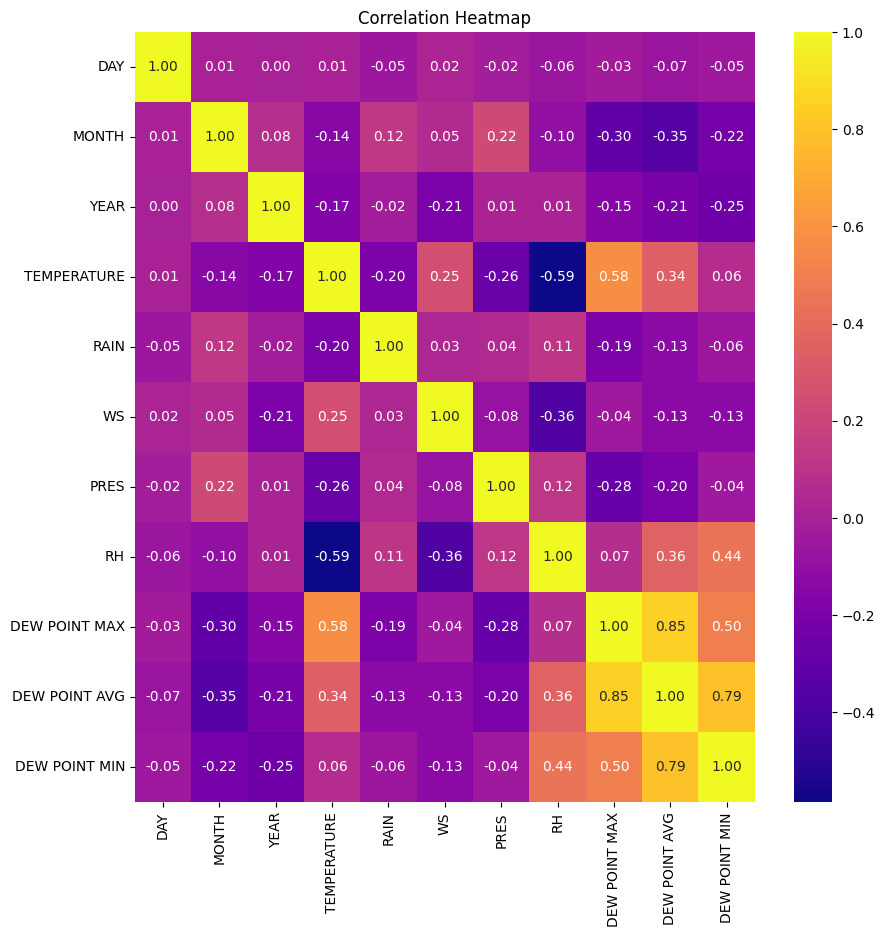

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**interpretation:**
The correlation analysis among the independent variables reveals interesting patterns:

1. **Dew Point Min, Dew Point Avg, and Dew Point Max:**
   - There is a substantial correlation between Dew Point Min and Dew Point Avg, as well as between Dew Point Min and Dew Point Max.
   - This strong correlation suggests that these variables share similar trends and tend to move together. It indicates a high degree of association in the moisture levels represented by dew points.
   - Understanding these relationships is crucial for avoiding multicollinearity issues in regression models, as these variables provide redundant information.

2. **Relative Humidity (RH) and Temperature:**
   - There is a notable negative correlation of -0.59 between RH and Temperature.
   - This negative correlation implies an inverse relationship—when RH increases, Temperature tends to decrease, and vice versa.
   - Such a relationship is intuitive, as higher relative humidity is often associated with cooler temperatures.

3. **Low Correlation Among Other Variables:**
   - The majority of independent variables show low correlation with each other.
   - Low correlations indicate that these variables provide distinct and independent information, which can be beneficial for model interpretation.
   - This suggests that changes in one variable are not strongly associated with changes in the others, contributing to the diversity of information captured by the variables.

In summary, the correlation analysis highlights strong associations between Dew Point Min, Dew Point Avg, and Dew Point Max, emphasizing the need to manage potential multicollinearity. Additionally, the negative correlation between RH and Temperature aligns with expectations, reflecting the inverse relationship between humidity and temperature. The generally low correlations among other variables suggest their independence, providing diverse insights into environmental conditions in the Bejaia region.

**Variance of each independant variable**:

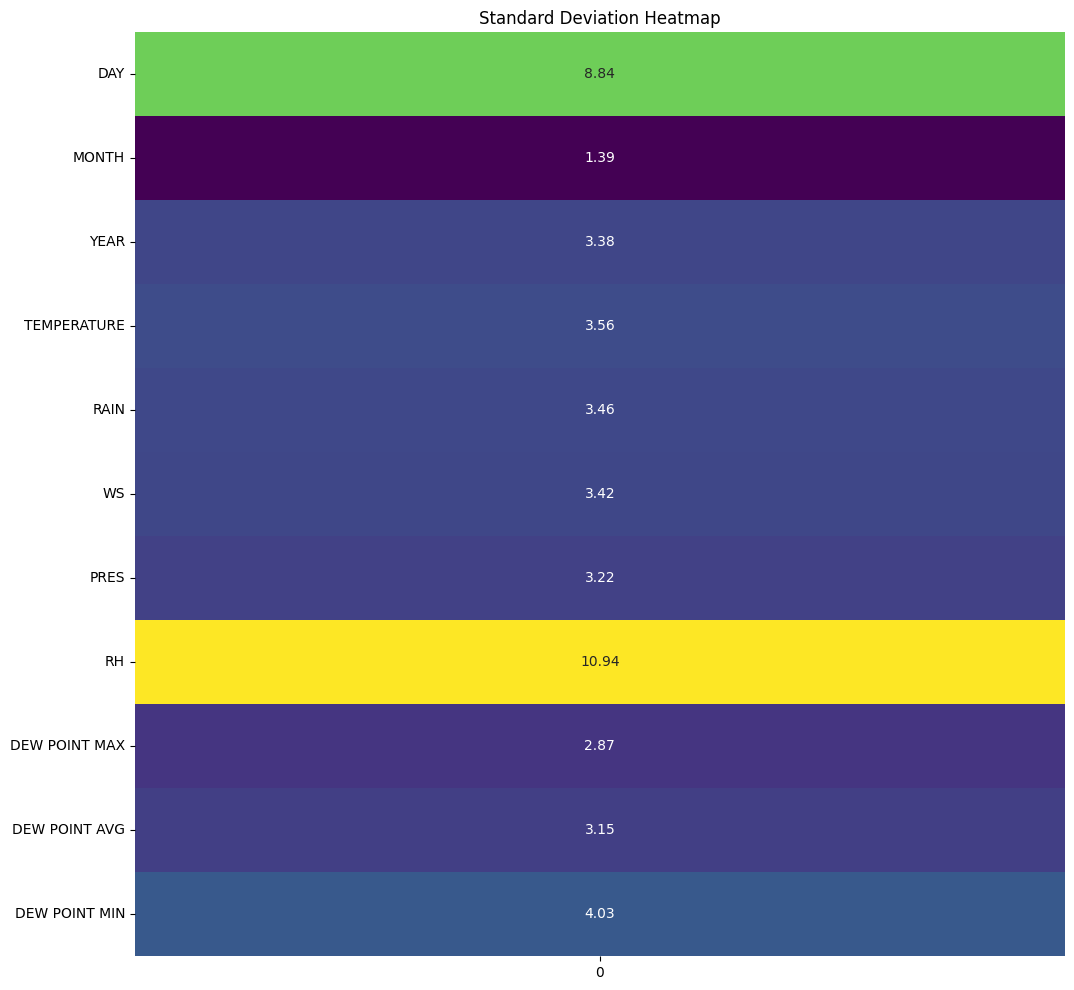

In [ ]:
std_deviation = X.std()
plt.figure(figsize=(12, 12))
sns.heatmap(std_deviation.to_frame(), annot=True, cmap='viridis', fmt=".2f", cbar=False)
plt.title('Standard Deviation Heatmap')
plt.show()

**interpretation:**
The interpretation of the variance of each independent variable indicates the degree of dispersion or spread in their respective distributions:

1. **Variables with Variance Around 3-4:**
   - For the majority of independent variables, the variance values hover around 3 and 4.
   - These relatively moderate variance values suggest a moderate degree of variability in the data points for these variables. The values are not extremely spread out, indicating a certain level of consistency or stability in the observations.

2. **Relative Humidity (RH) with Variance of 10:**
   - The variance of 10 for RH stands out as significantly higher compared to the other variables.
   - A higher variance in RH implies a more extensive range of humidity values, indicating greater variability in humidity levels across the dataset.
   - This increased variability in RH could be attributed to diverse weather conditions or seasonal fluctuations, where humidity experiences more significant variations compared to other variables.

In summary, the variance analysis highlights that most independent variables exhibit moderate variability, with values around 3-4, suggesting a certain degree of consistency in their distributions. The exception is Relative Humidity (RH), which stands out with a higher variance of 10, indicating more substantial variability in humidity levels. Understanding the variance of each variable is crucial for assessing the degree of data dispersion and gaining insights into the range of values observed for each environmental factor in the Bejaia region.

**Correlation with Target Variable"**

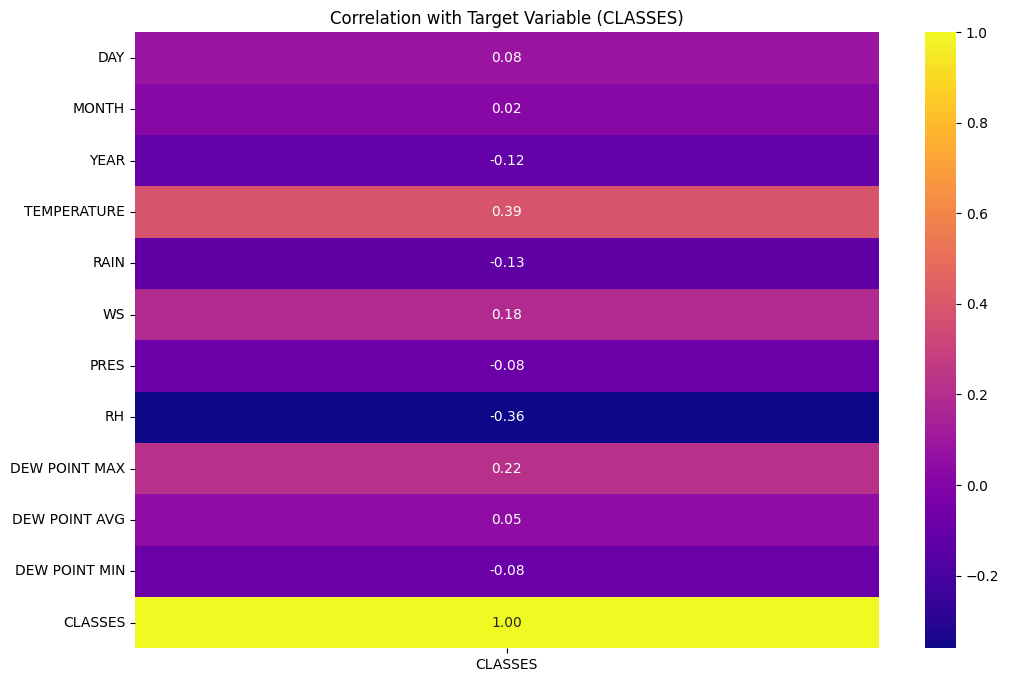

In [ ]:
correlation_matrix = X.join(y).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['CLASSES']], annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation with Target Variable (CLASSES)')
plt.show()

**interpretation:**
The interpretation of the correlation between independent variables and the target variable provides insights into how each environmental factor may be associated with the target variable (likely related to fire incidents). Here's an interpretation based on the correlation values:

1. **Relative Humidity (RH):**
   - RH shows a negative correlation of -0.35 with the target variable.
   - This negative correlation suggests that as Relative Humidity increases, the likelihood of fire incidents tends to decrease. Higher humidity levels are often associated with moister conditions, which may reduce the risk of fires.

2. **Wind Speed (WS):**
   - WS has a positive correlation of 0.18 with the target variable.
   - This positive correlation indicates that an increase in wind speed is associated with a slight increase in the likelihood of fire incidents. Higher wind speeds can potentially contribute to the spread of fires.

3. **Temperature:**
   - Temperature exhibits a positive correlation of 0.38 with the target variable.
   - This positive correlation suggests that higher temperatures are associated with a higher likelihood of fire incidents. Warmer conditions can contribute to drier vegetation and increased fire risk.

4. **Rain:**
   - Rain shows a negative correlation of -0.13 with the target variable.
   - This negative correlation indicates that as rainfall increases, the likelihood of fire incidents tends to decrease. Adequate rainfall can contribute to higher moisture levels, reducing the risk of fires.

In summary, the correlation analysis suggests that Relative Humidity, Wind Speed, Temperature, and Rain are associated with the likelihood of fire incidents. Notably, higher humidity, lower wind speed, lower temperatures, and increased rainfall are generally correlated with a lower likelihood of fires, aligning with common expectations based on environmental conditions conducive to fire prevention.


**Vizualisation : Line plot for Temporal trends :**

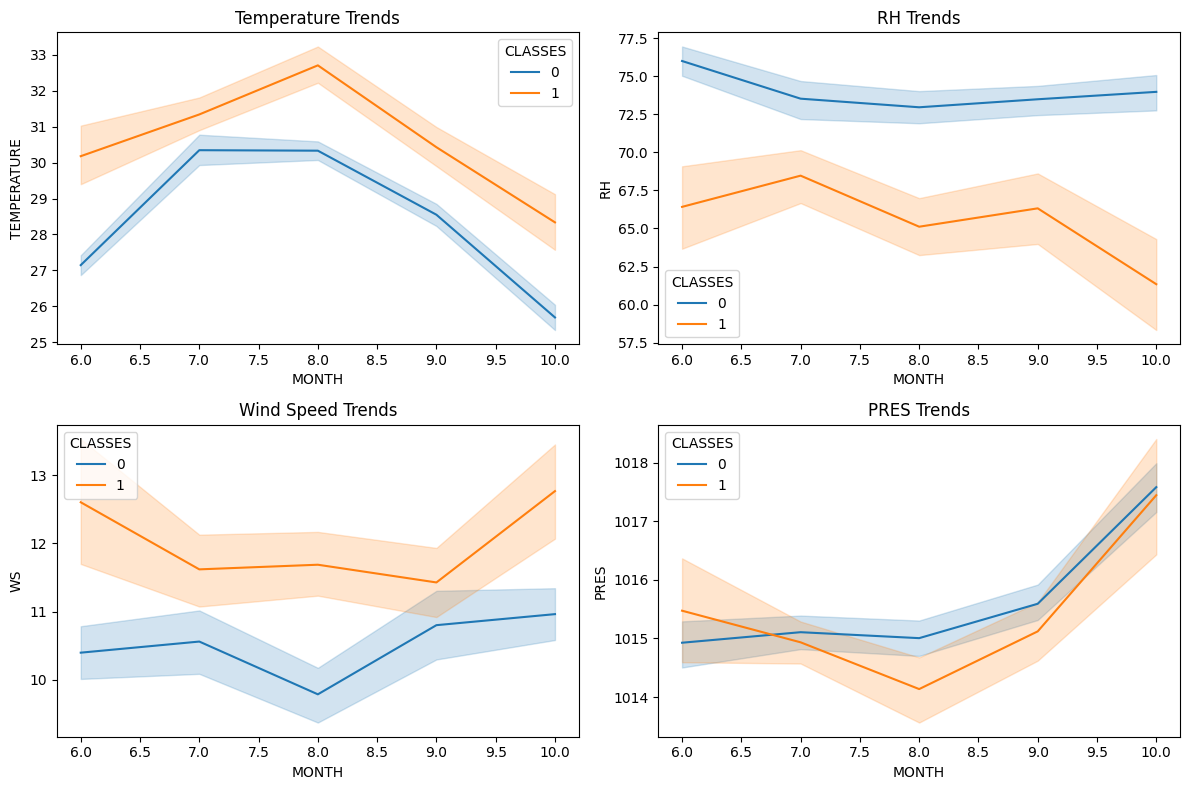

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.lineplot(x='MONTH', y='TEMPERATURE', data=X, ax=axes[0, 0], hue=y)
axes[0, 0].set_title('Temperature Trends')

sns.lineplot(x='MONTH', y='RH', data=X, ax=axes[0, 1], hue=y)
axes[0, 1].set_title('RH Trends')

sns.lineplot(x='MONTH', y='WS', data=X, ax=axes[1, 0], hue=y)
axes[1, 0].set_title('Wind Speed Trends')


sns.lineplot(x='MONTH', y='PRES', data=X, ax=axes[1, 1], hue=y)
axes[1, 1].set_title('PRES Trends')



plt.tight_layout()
plt.show()

In [ ]:

#Useful precise metrics for the Interpretation
from tabulate import tabulate #for tables

# a function to extract and print min/max values for a given feature
def print_feature_range(feature_name):
    # Extract minimum and maximum values for 'not fire' scenario
    min_not_fire = X.loc[y[y == 0].index, feature_name].min()
    max_not_fire = X.loc[y[y == 0].index, feature_name].max()

    # Extract minimum and maximum values for 'fire' scenario
    min_fire = X.loc[y[y == 1].index, feature_name].min()
    max_fire = X.loc[y[y == 1].index, feature_name].max()

    table = [
        ['Not Fire', f"{min_not_fire:.2f}", f"{max_not_fire:.2f}"],
        ['Fire', f"{min_fire:.2f}", f"{max_fire:.2f}"]
    ]

    # Print the table
    print(f"{feature_name} Range:")
    print(tabulate(table, headers=['Scenario', 'Minimum', 'Maximum'], tablefmt='pretty'))
    print()

# Print ranges for Temperature, RH, WS, and DMC
print_feature_range('TEMPERATURE')
print_feature_range('RH')
print_feature_range('WS')
print_feature_range('PRES')


TEMPERATURE Range:
+----------+---------+---------+
| Scenario | Minimum | Maximum |
+----------+---------+---------+
| Not Fire |  18.00  |  45.00  |
|   Fire   |  21.00  |  47.00  |
+----------+---------+---------+

RH Range:
+----------+---------+---------+
| Scenario | Minimum | Maximum |
+----------+---------+---------+
| Not Fire |  27.30  |  92.10  |
|   Fire   |  21.00  |  88.00  |
+----------+---------+---------+

WS Range:
+----------+---------+---------+
| Scenario | Minimum | Maximum |
+----------+---------+---------+
| Not Fire |  1.60   |  29.00  |
|   Fire   |  3.00   |  21.20  |
+----------+---------+---------+

PRES Range:
+----------+---------+---------+
| Scenario | Minimum | Maximum |
+----------+---------+---------+
| Not Fire | 966.40  | 1026.80 |
|   Fire   | 974.30  | 1025.60 |
+----------+---------+---------+



**Data interpretation**

**Temperature Trends (Top-Left)**:

The first subplot visualizes the trends in temperature over the months, with distinct lines representing variations in temperature for 'fire' and 'not fire' scenarios.

*'Not Fire' Scenario*:

*   The minimum temperature observed during 'not fire' instances is 18°C.
*   The maximum temperature recorded in the absence of fire is 45°C.

These values depict the range of temperature experienced during 4 months when no fire incidents occurred.

*'Fire' Scenario*:
*   -The minimum temperature during fire incidents is 27°C.

*   The maximum temperature observed during fire incidents is 47°C.

Fire scenarios tend to exhibit higher temperatures, with a broader range compared to non-fire instances. Months with elevated temperatures may correspond to increased fire risk.

By closely examining temperature fluctuations in different scenarios, we can gain insights into the environmental conditions associated with fire and non-fire instances, aiding in the development of predictive models for wildfire management in the Bejaia region.
**Wind Speed (WS) Trends (Bottom-Left)**:

The third subplot visualizes the trends in wind speed over the months, with distinct lines representing variations in WS for 'fire' and 'not fire' scenarios.

*'Not Fire' Scenario*:

*   The minimum wind speed observed during 'not fire' instances is 1.6 km/h.
*   The maximum wind speed recorded in the absence of fire is 29.00 km/h.

These values depict the range of wind speed experienced during the observed period when no fire incidents occurred.

*'Fire' Scenario*:

*   The minimum wind speed during fire incidents is 3.00 km/h.
*   The maximum wind speed observed during fire incidents is 21.00 km/h.

Fire scenarios tend to exhibit slightly higher wind speeds, indicating potentially more **dynamic environmental conditions**. Elevated wind speeds can contribute to the **rapid spread of wildfires**. Monitoring WS fluctuations provides insights into the environmental conditions conducive to fire incidents.


**Relative Humidity (RH) Trends (Top-Right)**:

The second subplot visualizes the trends in relative humidity over the months, with distinct lines representing variations in RH for 'fire' and 'not fire' scenarios.

*'Not Fire' Scenario*:

*   The minimum relative humidity observed during 'not fire' instances is 27.00%.
*   The maximum relative humidity recorded in the absence of fire is 92.00%.

These values depict the range of relative humidity experienced during the observed period when no fire incidents occurred.

*'Fire' Scenario*:

*   The minimum relative humidity during fire incidents is 21.00%.
*   The maximum relative humidity observed during fire incidents is 88.00%.

Fire scenarios tend to exhibit lower relative humidity, indicating potentially **drier conditions**. Lower humidity levels are associated with an increased risk of fire spread. Monitoring RH fluctuations provides insights into the environmental conditions conducive to fire incidents.


### Z-score normalization to handle outliers

In [ ]:
#Before detecting outliers, We make a view of the general statistics of our dataset using 'describe()'
data.describe()

DAY        MONTH         YEAR  TEMPERATURE         RAIN  \
count  1773.000000  1773.000000  1773.000000  1773.000000  1773.000000   
mean     15.798082     7.937394  2017.677383    29.213166     0.724931   
std       8.836479     1.386009     3.379451     3.559029     3.456777   
min       1.000000     6.000000  2012.000000    18.000000     0.000000   
25%       8.000000     7.000000  2015.000000    27.000000     0.000000   
50%      16.000000     8.000000  2018.000000    29.000000     0.000000   
75%      23.000000     9.000000  2021.000000    31.000000     0.000000   
max      31.000000    10.000000  2023.000000    47.000000    81.000000   

                WS         PRES           RH  DEW POINT MAX  DEW POINT AVG  \
count  1773.000000  1773.000000  1773.000000    1773.000000    1773.000000   
mean     10.994137  1015.451249    71.271806      21.631290      18.657779   
std       3.416304     3.218640    10.937698       2.874588       3.150272   
min       1.600000   966.400000    21.000000      10.000000       5.800000   
25%       8.900000  1014.028571    66.500000      20.000000      17.000000   
50%      10.800000  1015.451249    73.500000      22.000000      19.200000   
75%      13.000000  1016.800000    78.900000      24.000000      20.800000   
max      29.000000  1026.800000    92.100000      28.000000      25.500000   

       DEW POINT MIN      CLASSES  
count    1773.000000  1773.000000  
mean       15.090447     0.348562  
std         4.029879     0.476649  
min        -6.000000     0.000000  
25%        13.000000     0.000000  
50%        16.000000     0.000000  
75%        18.000000     1.000000  
max        24.000000     1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1773 entries, 0 to 1773
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DAY            1773 non-null   int64  
 1   MONTH          1773 non-null   int64  
 2   YEAR           1773 non-null   int64  
 3   TEMPERATURE    1773 non-null   float64
 4   RAIN           1773 non-null   float64
 5   WS             1773 non-null   float64
 6   PRES           1773 non-null   float64
 7   RH             1773 non-null   float64
 8   DEW POINT MAX  1773 non-null   float64
 9   DEW POINT AVG  1773 non-null   float64
 10  DEW POINT MIN  1773 non-null   float64
 11  CLASSES        1773 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 244.6 KB


In [ ]:
numerical_columns = ['TEMPERATURE', 'RAIN', 'WS', 'PRES', 'RH', 'DEW POINT AVG']
#working on a copy of the original dataset 'data'
data_scaled = data.copy()
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler (Z-score )
scaler = StandardScaler()

# Fit and transform the selected columns
data_scaled[numerical_columns] = scaler.fit_transform(data_scaled[numerical_columns])
data_scaled

DAY  MONTH  YEAR  TEMPERATURE      RAIN        WS      PRES        RH  \
0       1      6  2023    -1.942978 -0.151899 -0.525317 -0.544249  0.761636   
1       2      6  2023    -1.633818 -0.209772 -0.554597 -0.948261  0.907960   
2       3      6  2023    -2.364560 -0.209772 -0.671715 -0.357783  1.109156   
3       4      6  2023    -1.465185  2.568165 -0.671715 -0.637483  0.779926   
4       5      6  2023    -1.380869 -0.209772 -0.554597 -0.326705  0.798217   
...   ...    ...   ...          ...       ...       ...       ...       ...   
1769   26      9  2012     0.502198 -0.209772  0.001717 -1.880594 -1.579553   
1770   27      9  2012     0.502198 -0.209772  0.001717 -1.694128 -0.482121   
1771   28      9  2012     0.783253 -0.007214  0.880106 -2.533228 -2.219722   
1772   29      9  2012    -0.903076  0.311091  1.465699 -0.823950  0.798217   
1773   30      9  2012    -1.184130  0.195344  0.880106  0.077306  0.615312   

      DEW POINT MAX  DEW POINT AVG  DEW POINT MIN  CLASSES  
0              17.0      -1.002666           11.0        0  
1              18.0      -0.875657           14.0        0  
2              17.0      -0.875657           14.0        0  
3              18.0      -0.653391           15.0        0  
4              19.0      -0.716896            9.0        0  
...             ...            ...            ...      ...  
1769           23.0       0.521442           17.0        0  
1770           23.0       0.743708           19.0        1  
1771           24.0       0.902469           20.0        0  
1772           20.0      -0.113603           16.0        0  
1773           19.0      -0.431125           15.0        0  

[1773 rows x 12 columns]

In [ ]:
# Set a threshold for identifying outliers
threshold = 3

# Identify outliers based on the threshold
outliers = (abs(data_scaled[numerical_columns]) > threshold).any(axis=1)

# Display rows with outliers
data_scaled[outliers]

DAY  MONTH  YEAR  TEMPERATURE      RAIN        WS       PRES        RH  \
18     19      6  2023     2.750636 -0.209772  1.114344  -1.911672 -3.335445   
39     10      7  2023     4.436965 -0.209772  0.499471   0.667785 -2.850746   
40     11      7  2023     3.874855 -0.209772  0.850827  -0.078082 -3.554932   
41     12      7  2023     3.593801 -0.209772  1.699937  -0.699638 -2.494081   
46     17      7  2023     3.144113 -0.209772 -0.144682   0.108384 -2.320320   
...   ...    ...   ...          ...       ...       ...        ...       ...   
1655    4      6  2012    -1.184130  0.513649  0.587310 -15.244045  1.621291   
1704   23      7  2012    -0.622021 -0.094025  3.222479  -0.357783 -0.482121   
1733   21      8  2012     1.907472 -0.209772  2.344089 -12.788899 -1.213743   
1743   31      8  2012    -0.340966  4.651617  2.929682   0.729940  0.798217   
1757   14      9  2012    -2.027295  2.191986  4.393665  -0.606405  0.432406   

      DEW POINT MAX  DEW POINT AVG  DEW POINT MIN  CLASSES  
18             20.0      -1.478950            6.0        0  
39             24.0      -0.558134            9.0        0  
40             24.0      -1.637711            6.0        0  
41             25.0      -0.685143            9.0        1  
46             25.0      -0.113603           10.0        0  
...             ...            ...            ...      ...  
1655           21.0       0.172167           17.0        0  
1704           19.0      -0.558134           13.0        0  
1733           25.0       0.648451           16.0        1  
1743           23.0       0.553194           18.0        0  
1757           18.0      -0.621639           16.0        0  

[106 rows x 12 columns]

We notice that there are **97** rows containing outliers that exceed the threshold for Z-score

In [ ]:
#Identify the number of outliers in each column
numOfOutliers = {}
for column in numerical_columns:
    numOfOutliers[column] = (abs(data_scaled[column]) > threshold).sum()

numOfOutliers

{'TEMPERATURE': 22,
 'RAIN': 26,
 'WS': 7,
 'PRES': 13,
 'RH': 31,
 'DEW POINT AVG': 25}

The number of outliers in each column is represented above


### Part3: Dimensionality Reduction
In this phase, we leverage dimensionality reduction to selectively retain attributes that significantly contribute to our target result using both techincs:
* Feature extraction using PCA
* Features selection

##### Phase1: Feature extraction with PCA

In [ ]:
#Billal (code of Hamza)
import pandas as pd
from sklearn.decomposition import PCA


# # Drop the 'CLASSES' column
# X = data.drop('CLASSES', axis=1)

# # Separate the 'CLASSES' column (target variable)
# y = data['CLASSES']


# Apply PCA with minimum reserved variance 98%
pca = PCA(n_components=0.98)
X2D = pca.fit_transform(X)

# Re-append the 'CLASSES' column to the reduced dataset
columns_after_pca = [f"PC_{i+1}" for i in range(X2D.shape[1])]
reduced_pc_data = pd.DataFrame(data=X2D, columns=columns_after_pca)
reduced_pc_data['CLASSES'] = y
reduced_pc_data.dropna(subset=['CLASSES'], inplace=True)

# reduced_pc_data['CLASSES'] = reduced_pc_data['CLASSES'].astype('int64')

# Display the first few rows of the resulting dataset
reduced_pc_data.head()
# data.iloc[1573,:]


PC_1       PC_2       PC_3      PC_4      PC_5      PC_6      PC_7  \
0  -9.807541  13.387431  10.136419 -4.154245  1.604995 -3.600392  0.141020   
1 -11.555044  12.259665   7.289601 -4.272826  2.227690 -3.642019 -0.081635   
2 -14.084002  10.903948   9.320408 -3.915034  0.799024 -2.747666 -0.322522   
3 -10.563240  10.599273   7.903554  0.662843  8.304993  2.211091 -1.043072   
4  -9.199149   9.480432   8.999003 -4.852253  1.815436 -3.636840 -0.153120   

       PC_8  CLASSES  
0 -2.338436      0.0  
1 -3.533881      0.0  
2 -4.193322      0.0  
3 -2.999536      0.0  
4  1.099223      0.0

##### Phase2: Feature Selection


* Unsupervised Feature Selection


In [ ]:
#Varaince Filter
X = data.drop(columns=['CLASSES'])
variance_per_attribute = X.var()
variance_per_attribute

DAY               78.083360
MONTH              1.921022
YEAR              11.420690
TEMPERATURE       12.666689
RAIN              11.949307
WS                11.671135
PRES              10.359641
RH               119.633245
DEW POINT MAX      8.263258
DEW POINT AVG      9.924215
DEW POINT MIN     16.239924
dtype: float64

In [ ]:
#Correlation Filter
correlation_matrix = X.corr()
correlation_matrix

DAY     MONTH      YEAR  TEMPERATURE      RAIN        WS  \
DAY            1.000000  0.007169  0.001030     0.005356 -0.053518  0.017183   
MONTH          0.007169  1.000000  0.076529    -0.143282  0.121602  0.049682   
YEAR           0.001030  0.076529  1.000000    -0.165471 -0.022498 -0.206716   
TEMPERATURE    0.005356 -0.143282 -0.165471     1.000000 -0.198232  0.251096   
RAIN          -0.053518  0.121602 -0.022498    -0.198232  1.000000  0.027967   
WS             0.017183  0.049682 -0.206716     0.251096  0.027967  1.000000   
PRES          -0.019142  0.223180  0.013017    -0.263812  0.042701 -0.077797   
RH            -0.058812 -0.097024  0.009755    -0.585109  0.110179 -0.363716   
DEW POINT MAX -0.030124 -0.301444 -0.145877     0.577031 -0.192496 -0.040752   
DEW POINT AVG -0.065874 -0.345190 -0.208099     0.340579 -0.131487 -0.129062   
DEW POINT MIN -0.050262 -0.215305 -0.246963     0.061828 -0.055604 -0.127504   

                   PRES        RH  DEW POINT MAX  DEW POINT AVG  DEW POINT MIN  
DAY           -0.019142 -0.058812      -0.030124      -0.065874      -0.050262  
MONTH          0.223180 -0.097024      -0.301444      -0.345190      -0.215305  
YEAR           0.013017  0.009755      -0.145877      -0.208099      -0.246963  
TEMPERATURE   -0.263812 -0.585109       0.577031       0.340579       0.061828  
RAIN           0.042701  0.110179      -0.192496      -0.131487      -0.055604  
WS            -0.077797 -0.363716      -0.040752      -0.129062      -0.127504  
PRES           1.000000  0.120071      -0.281654      -0.202464      -0.043180  
RH             0.120071  1.000000       0.069755       0.357257       0.444889  
DEW POINT MAX -0.281654  0.069755       1.000000       0.847569       0.498471  
DEW POINT AVG -0.202464  0.357257       0.847569       1.000000       0.794540  
DEW POINT MIN -0.043180  0.444889       0.498471       0.794540       1.000000

* For better visulization we can go back to the visulization phase which the correlation_matrix is well presented on a HeatMap

* The reuslt of this unsupervised filtering
Columns with very low variance may not provide much discriminatory information and could potentially be candidates for removal in this case we are noticing that the columns DEW POINT MAX and AVG have the samllest variance and they are highly correlated to the attribute DEW POINT MIN so we can keep only this attribute

In [ ]:
columns_to_remove = ['DEW POINT AVG', 'DEW POINT MAX']
reduced_uf_data = data.drop(columns=columns_to_remove)
reduced_uf_data

DAY  MONTH  YEAR  TEMPERATURE  RAIN    WS    PRES    RH  DEW POINT MIN  \
0       1      6  2023         22.3   0.2   9.2  1013.7  79.6           11.0   
1       2      6  2023         23.4   0.0   9.1  1012.4  81.2           14.0   
2       3      6  2023         20.8   0.0   8.7  1014.3  83.4           14.0   
3       4      6  2023         24.0   9.6   8.7  1013.4  79.8           15.0   
4       5      6  2023         24.3   0.0   9.1  1014.4  80.0            9.0   
...   ...    ...   ...          ...   ...   ...     ...   ...            ...   
1769   26      9  2012         31.0   0.0  11.0  1009.4  54.0           17.0   
1770   27      9  2012         31.0   0.0  11.0  1010.0  66.0           19.0   
1771   28      9  2012         32.0   0.7  14.0  1007.3  47.0           20.0   
1772   29      9  2012         26.0   1.8  16.0  1012.8  80.0           16.0   
1773   30      9  2012         25.0   1.4  14.0  1015.7  78.0           15.0   

      CLASSES  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1769        0  
1770        1  
1771        0  
1772        0  
1773        0  

[1773 rows x 10 columns]

* Supervised feature selection


In [ ]:
#correlation with the target
y = data['CLASSES']
correlation_matrix = X.join(y).corr()
correlation_matrix

DAY     MONTH      YEAR  TEMPERATURE      RAIN        WS  \
DAY            1.000000  0.007169  0.001030     0.005356 -0.053518  0.017183   
MONTH          0.007169  1.000000  0.076529    -0.143282  0.121602  0.049682   
YEAR           0.001030  0.076529  1.000000    -0.165471 -0.022498 -0.206716   
TEMPERATURE    0.005356 -0.143282 -0.165471     1.000000 -0.198232  0.251096   
RAIN          -0.053518  0.121602 -0.022498    -0.198232  1.000000  0.027967   
WS             0.017183  0.049682 -0.206716     0.251096  0.027967  1.000000   
PRES          -0.019142  0.223180  0.013017    -0.263812  0.042701 -0.077797   
RH            -0.058812 -0.097024  0.009755    -0.585109  0.110179 -0.363716   
DEW POINT MAX -0.030124 -0.301444 -0.145877     0.577031 -0.192496 -0.040752   
DEW POINT AVG -0.065874 -0.345190 -0.208099     0.340579 -0.131487 -0.129062   
DEW POINT MIN -0.050262 -0.215305 -0.246963     0.061828 -0.055604 -0.127504   
CLASSES        0.083578  0.018528 -0.115130     0.386359 -0.126564  0.184660   

                   PRES        RH  DEW POINT MAX  DEW POINT AVG  \
DAY           -0.019142 -0.058812      -0.030124      -0.065874   
MONTH          0.223180 -0.097024      -0.301444      -0.345190   
YEAR           0.013017  0.009755      -0.145877      -0.208099   
TEMPERATURE   -0.263812 -0.585109       0.577031       0.340579   
RAIN           0.042701  0.110179      -0.192496      -0.131487   
WS            -0.077797 -0.363716      -0.040752      -0.129062   
PRES           1.000000  0.120071      -0.281654      -0.202464   
RH             0.120071  1.000000       0.069755       0.357257   
DEW POINT MAX -0.281654  0.069755       1.000000       0.847569   
DEW POINT AVG -0.202464  0.357257       0.847569       1.000000   
DEW POINT MIN -0.043180  0.444889       0.498471       0.794540   
CLASSES       -0.079098 -0.360661       0.218294       0.048592   

               DEW POINT MIN   CLASSES  
DAY                -0.050262  0.083578  
MONTH              -0.215305  0.018528  
YEAR               -0.246963 -0.115130  
TEMPERATURE         0.061828  0.386359  
RAIN               -0.055604 -0.126564  
WS                 -0.127504  0.184660  
PRES               -0.043180 -0.079098  
RH                  0.444889 -0.360661  
DEW POINT MAX       0.498471  0.218294  
DEW POINT AVG       0.794540  0.048592  
DEW POINT MIN       1.000000 -0.081456  
CLASSES            -0.081456  1.000000

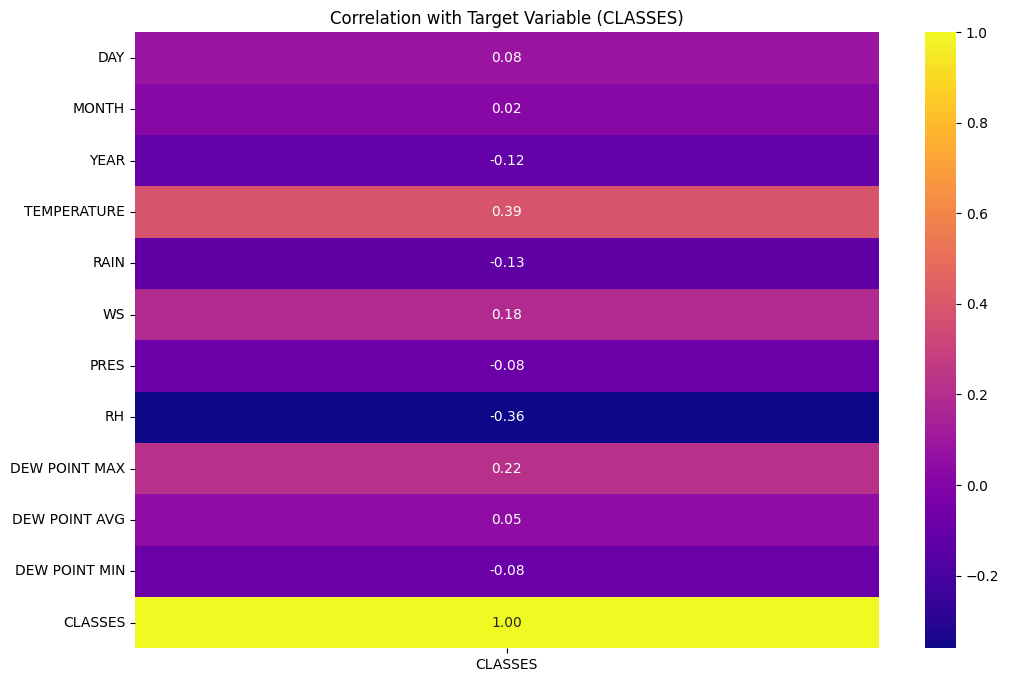

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['CLASSES']], annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation with Target Variable (CLASSES)')
plt.show()

* As it is shown the correlations between DEW POINT MIN,DEW POINT AVG and PRES to the target CLASSES are very low which means they are not good candidates for predictive models

In [ ]:
#remove the indetified columns
columns_to_remove = ['DEW POINT AVG', 'DEW POINT MIN', 'PRES']
reduced_sf_data = data.drop(columns=columns_to_remove)
reduced_sf_data

DAY  MONTH  YEAR  TEMPERATURE  RAIN    WS    RH  DEW POINT MAX  CLASSES
0       1      6  2023         22.3   0.2   9.2  79.6           17.0        0
1       2      6  2023         23.4   0.0   9.1  81.2           18.0        0
2       3      6  2023         20.8   0.0   8.7  83.4           17.0        0
3       4      6  2023         24.0   9.6   8.7  79.8           18.0        0
4       5      6  2023         24.3   0.0   9.1  80.0           19.0        0
...   ...    ...   ...          ...   ...   ...   ...            ...      ...
1769   26      9  2012         31.0   0.0  11.0  54.0           23.0        0
1770   27      9  2012         31.0   0.0  11.0  66.0           23.0        1
1771   28      9  2012         32.0   0.7  14.0  47.0           24.0        0
1772   29      9  2012         26.0   1.8  16.0  80.0           20.0        0
1773   30      9  2012         25.0   1.4  14.0  78.0           19.0        0

[1773 rows x 9 columns]

### Part 4: Model Prediction and Evaluation
#### Decision Trees and Random Forest Models
Wz will focus on utilizing decision trees and random forest models. Various training techniques will be employed, including:

* **Holdout Method**: Dividing the dataset into training and validation sets.
* **Cross-Validation**: Employing cross-validation to robustly assess model performance.
* **GridSearch Optimization**: Utilizing GridSearch to optimize hyperparameters for enhanced model performance.
#### Evaluation Metrics
The model's performance will be evaluated based on multiple metrics to comprehensively gauge its effectiveness:

* **Accuracy**: Determining the ratio of correctly predicted instances to the total instances.
* **F-score**: Balancing precision and recall for assessing model accuracy.
* **Precision**: Evaluating the ratio of correctly predicted positive observations to the total predicted positives.
* **Recall**: Assessing the ratio of correctly predicted positive observations to the all actual positives.

#### First: Decision Tree

In [ ]:
#Billal

**First Try**: we will use non parametric decision tree using holdout method


In [ ]:
data.columns

Index(['DAY', 'MONTH', 'YEAR', 'TEMPERATURE', 'RAIN', 'WS', 'PRES', 'RH',
       'DEW POINT MAX', 'DEW POINT AVG', 'DEW POINT MIN', 'CLASSES'],
      dtype='object')

In [ ]:
def splitData(data):
    #split dataset in features and target variable
    columns_to_remove = ['DAY', 'MONTH', 'YEAR']  #this just because I want to test with this data
    data = data.drop(columns=columns_to_remove, errors='ignore')
    X = data.drop(columns=['CLASSES'])  # Features
    y = data['CLASSES']
    return X,y


* For the dataset we will use the orginal data, PCA generated data,generated data and data after features selection


In [ ]:
datasets = [data, reduced_uf_data, reduced_sf_data]#Original Data, dataPCA, dataSelected(Unsupervised), dataSelected(Supervised)(after features selection)
X_datasets = []
for dataset in datasets:
    X, y = splitData(dataset)
    X_datasets.append(X)

#split data into training and testing dataset from orignal dataset
X_train,X_test,Y_train,Y_test = train_test_split(X_datasets[0], y, test_size=0.3, random_state=1)
Xu_train,Xu_test,Y_train,Y_test = train_test_split(X_datasets[1], y, test_size=0.3, random_state=1)
Xs_train,Xs_test,Y_train,Y_test = train_test_split(X_datasets[2], y, test_size=0.3, random_state=1)




In [ ]:
def non_par_DTC(X_train,X_test,Y_train):
   clf = DecisionTreeClassifier()

   clf = clf.fit(X_train, Y_train)

   return clf,clf.predict(X_test)

In [ ]:
clf,y_pred = non_par_DTC(X_train,X_test,Y_train)
clfu,yu_pred = non_par_DTC(Xu_train,Xu_test,Y_train)
clfs,ys_pred = non_par_DTC(Xs_train,Xs_test,Y_train)

In [ ]:
# Model Accuracy for orgignal data
print('Model Accuracy for orgignal data')
print("Accuracy:",metrics.accuracy_score(y_pred,Y_test))
print("Classification Report:\n", classification_report(y_pred, Y_test))
print('--------------------------------------------')


print('Model Accuracy for  generated data after unsupervised features selection')
print("Accuracy:",metrics.accuracy_score(yu_pred,Y_test))
print("Classification Report:\n", classification_report(yu_pred, Y_test))
print('--------------------------------------------')
print('Model Accuracy for data after supervised features selection')
print("Accuracy:",metrics.accuracy_score(ys_pred,Y_test))
print("Classification Report:\n", classification_report(y_pred, Y_test))

Model Accuracy for orgignal data
Accuracy: 0.6578947368421053
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       339
           1       0.53      0.54      0.53       193

    accuracy                           0.66       532
   macro avg       0.63      0.63      0.63       532
weighted avg       0.66      0.66      0.66       532

--------------------------------------------
Model Accuracy for  generated data after unsupervised features selection
Accuracy: 0.6691729323308271
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       345
           1       0.53      0.56      0.54       187

    accuracy                           0.67       532
   macro avg       0.64      0.64      0.64       532
weighted avg       0.67      0.67      0.67       532

--------------------------------------------
Model Accuracy for data after supervised fea

##### Interpretation:
* The observed accuracy in the range of 0.6 to 0.7 suggests that the model's performance is suboptimal, achieving successful predictions for only around 70% of the tested data. This level of accuracy falls short of the desired standard

* the model demonstrates a precision of approximately 0.75, indicating its ability to accurately predict positive values. However, it's important to note that precision alone doesn't provide a comprehensive assessment of the model's performance.
* The best recall values is 0.74 wihch indicate how well the model captures all the relevant cases and in this case we can consider it as average

* when comparing results between the original and reduced datasets, the model appears to perform a little bit better on the supervised features selection data across various metrics.

* To delve deeper and optimize the model's performance while considering computational efficiency, we aim to identify the best parameter values applicable to the decision tree algorithm

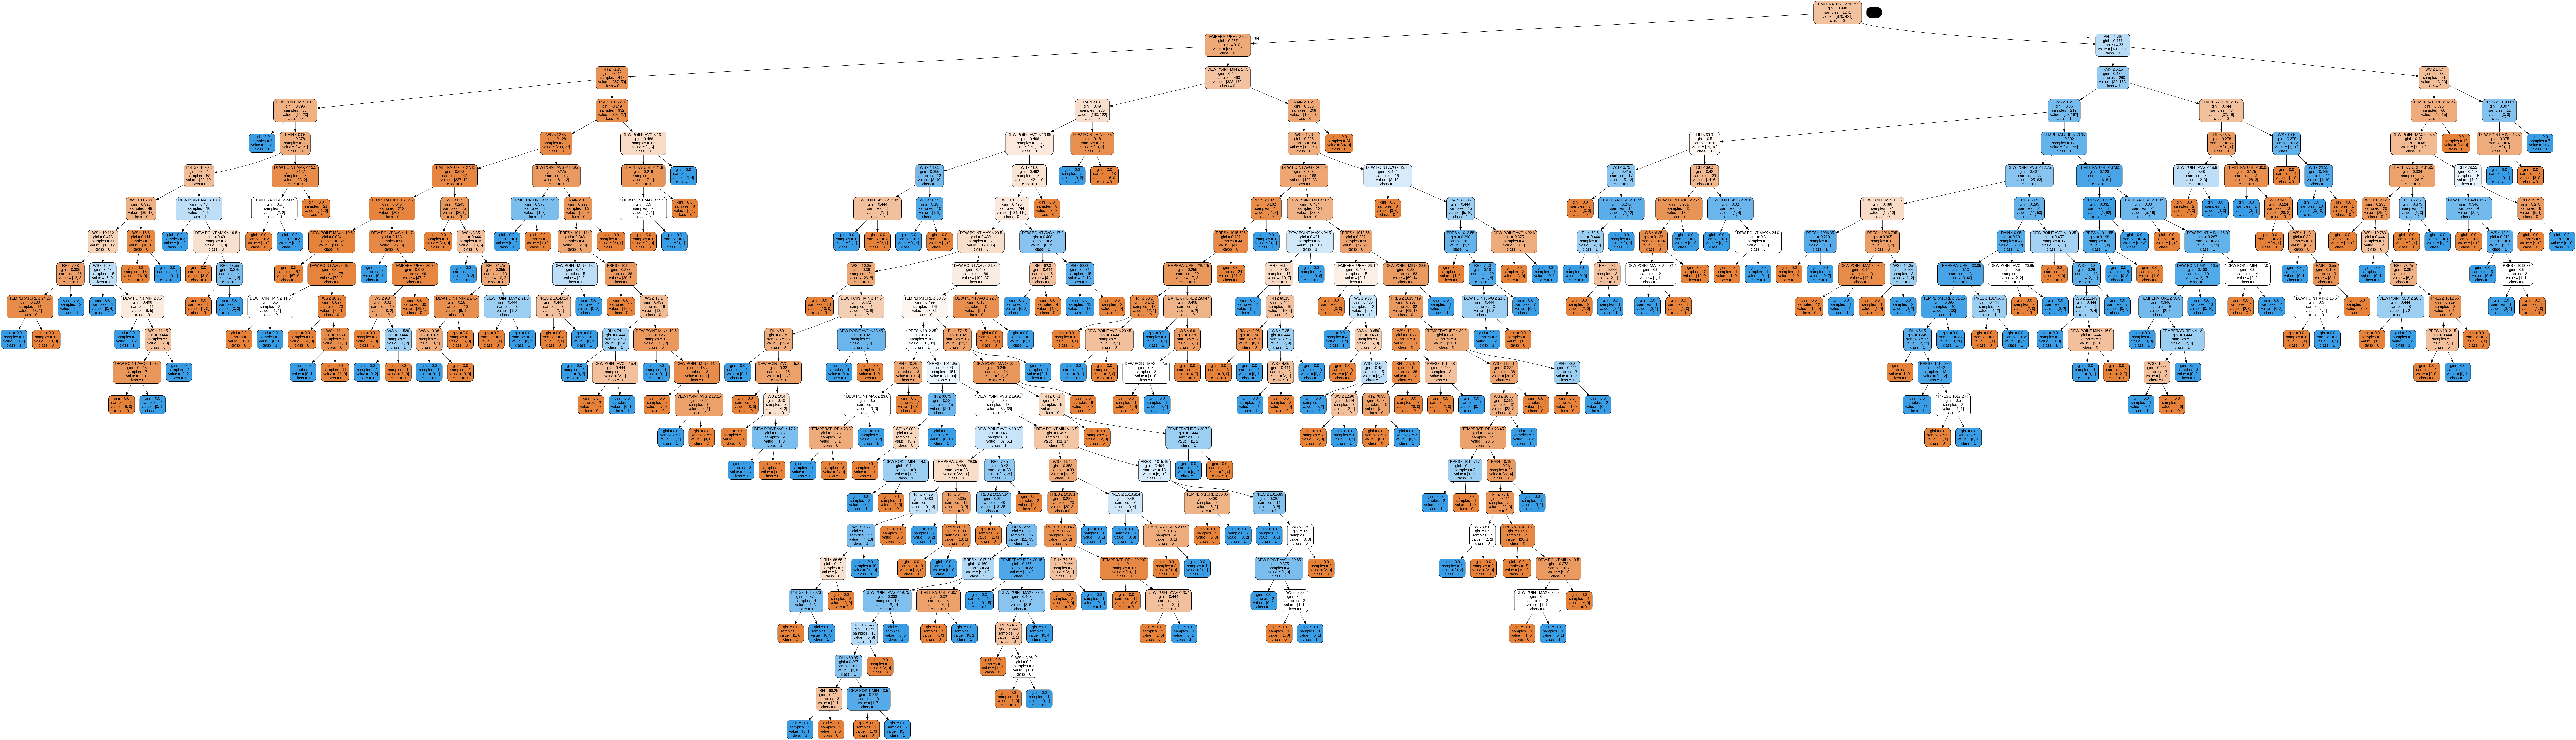

In [ ]:
#Original Data
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X_datasets[0].columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
# optimizing on the original dataset
def evaluate_decision_tree(hyperparameter_range, hyperparameter_name):
    train_accuracies = []
    test_accuracies = []

    for value in hyperparameter_range:
        clf_params = {hyperparameter_name: value, 'random_state': 42}
        clf = DecisionTreeClassifier(**clf_params)
        clf.fit(X_train, Y_train)
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)
        train_accuracy = accuracy_score(Y_train, train_pred)
        test_accuracy = accuracy_score(Y_test, test_pred)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    return train_accuracies, test_accuracies

In [ ]:
def plot_hyperparameter_results(hyperparameter_range, train_accuracies, test_accuracies, hyperparameter_name):
    plt.figure(figsize=(12, 6))

    # Check if the hyperparameter values are continuous or discrete
    if isinstance(hyperparameter_range[0], (int, float)):
        # Continuous hyperparameter
        plt.plot(hyperparameter_range, train_accuracies, label='Train Accuracy', marker='o', linestyle='-', markersize=5)
        plt.plot(hyperparameter_range, test_accuracies, label='Test Accuracy', marker='o', linestyle='-', markersize=5)
        plt.xticks(hyperparameter_range)  # Set x-axis ticks
        # Adding vertical lines for each tick
        for x in hyperparameter_range:
            plt.axvline(x, color='gray', linestyle='--', linewidth=0.5)
    else:
        # Discrete hyperparameter
        # Setting the width of the bars
        bar_width = 0.35

        # Calculating the positions of the bars
        index = np.arange(len(hyperparameter_range))

        # Creating bar plots
        plt.bar(index, train_accuracies, bar_width, label='Train Accuracy', alpha=0.6)
        plt.bar(index + bar_width, test_accuracies, bar_width, label='Validation Accuracy', alpha=0.6)
        plt.xticks(index + bar_width / 2, hyperparameter_range)  # Set x-axis ticks

    plt.xlabel(hyperparameter_name.capitalize())
    plt.ylabel('Accuracy')
    plt.title(f'Decision Tree Model Selection: {hyperparameter_name.capitalize()} vs Accuracy')
    plt.legend()
    plt.show()

In [ ]:
hyperparameter_name_MSL = 'min_samples_leaf'
hyperparameter_range_MSL = range(1, 20)  # Adjust the range as needed
hyperparameter_name_MD = 'max_depth'
hyperparameter_range_MD = range(1, 30)

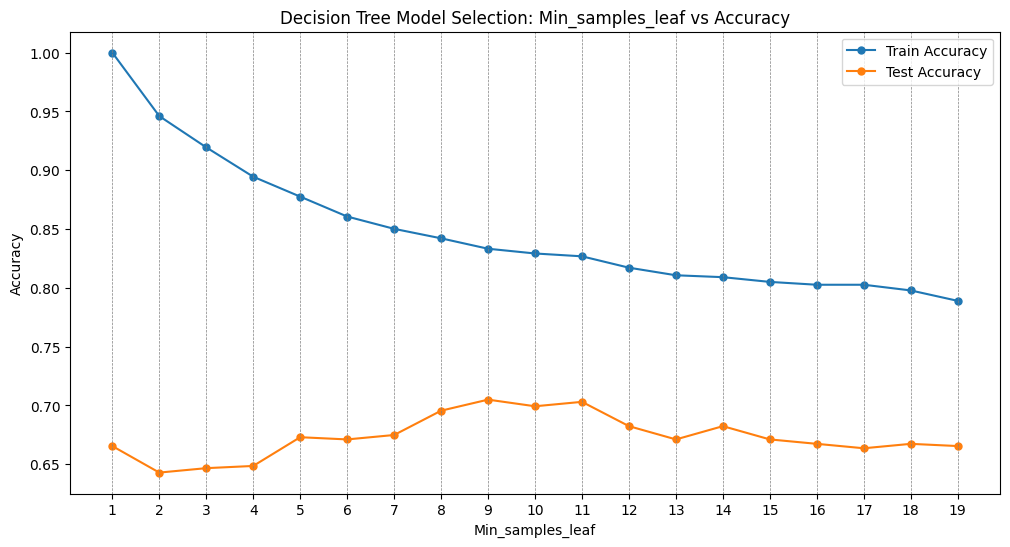

In [ ]:
train_accuracies, test_accuracies = evaluate_decision_tree(hyperparameter_range_MSL, hyperparameter_name_MSL)
plot_hyperparameter_results(hyperparameter_range_MSL, train_accuracies, test_accuracies, hyperparameter_name_MSL)

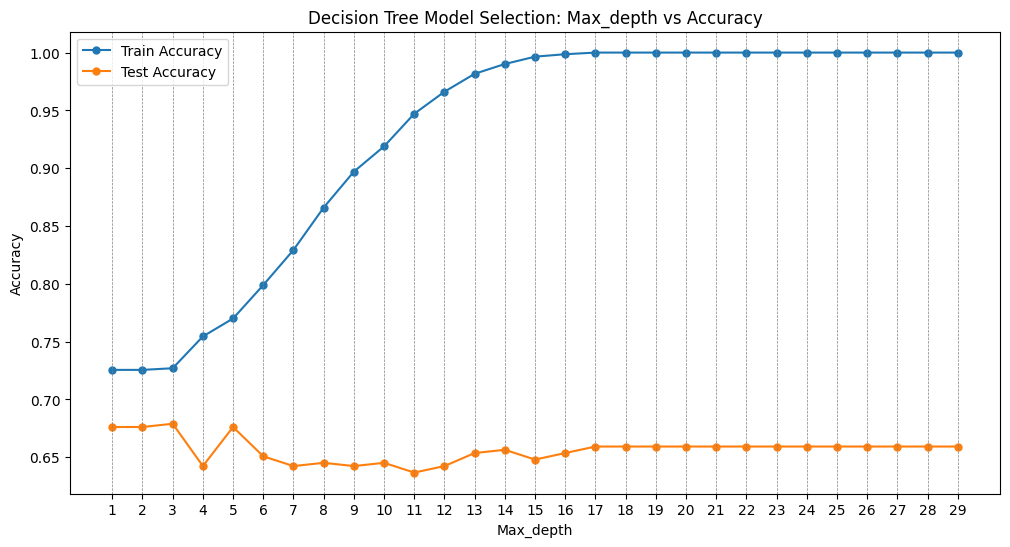

In [ ]:
train_accuracies, test_accuracies = evaluate_decision_tree(hyperparameter_range_MD, hyperparameter_name_MD)
plot_hyperparameter_results(hyperparameter_range_MD, train_accuracies, test_accuracies, hyperparameter_name_MD)

* As we can see through this graph representation the optimal value of min samples leaf is 9 which leads to very best accuarcy around 0.7 and for max depth the optimal value is 3 which leads to accuracy above 0.67
* as we can notice the overfitting occurce when the max_depth get bigger which indicate that the model get strongly related to the train dataset
* In general this model's preformance is average in predection the target values with different values of parameters
* as we can notice

In [ ]:
optimal_value = 9
final_model = DecisionTreeClassifier(**{hyperparameter_name_MD: optimal_value, 'random_state': 42})
final_model.fit(X_train, Y_train)
final_test_accuracy = accuracy_score(final_model.predict(X_test), Y_test)
print("Test Accuracy of Optimal Model:", final_test_accuracy)
print("Classification Report:\n", classification_report(final_model.predict(X_test), Y_test))
print('--------------------------------------------')

Test Accuracy of Optimal Model: 0.6422535211267606
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       247
         1.0       0.43      0.50      0.46       108

    accuracy                           0.64       355
   macro avg       0.59      0.60      0.60       355
weighted avg       0.66      0.64      0.65       355

--------------------------------------------


In [ ]:
optimal_value = 3
final_model = DecisionTreeClassifier(**{hyperparameter_name_MSL: optimal_value, 'random_state': 42})
final_model.fit(X_train, Y_train)
final_test_accuracy = accuracy_score(final_model.predict(X_test), Y_test)
print("Test Accuracy of Optimal Model:", final_test_accuracy)
print("Classification Report:\n", classification_report(final_model.predict(X_test), Y_test))
print('--------------------------------------------')

Test Accuracy of Optimal Model: 0.6676056338028169
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.75       238
         1.0       0.50      0.54      0.52       117

    accuracy                           0.67       355
   macro avg       0.63      0.63      0.63       355
weighted avg       0.68      0.67      0.67       355

--------------------------------------------


## **model selection - Part 2**
##### in the next section different models are used in order to decide which one will work better with the used dataset

#### part2.1 : working on the origninal dataset (after scaling)


In [210]:
# Use the scaled data for our model selection
X_scaled = data_scaled.drop(columns=['CLASSES'])  # Features
y_scaled = data_scaled['CLASSES']  # Target variable

# Split the data into training, validation, and testing sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: {'C': 100}
Best score for Logistic Regression: 0.7349
Validation Accuracy for Logistic Regression: 0.7256
Validation F1 Score for Logistic Regression: 0.5166
Validation Recall for Logistic Regression: 0.4194
Validation Precision for Logistic Regression: 0.6724
Test Accuracy for Logistic Regression: 0.6992
Test F1 Score for Logistic Regression: 0.5122
Test Recall for Logistic Regression: 0.4000
Test Precision for Logistic Regression: 0.7119


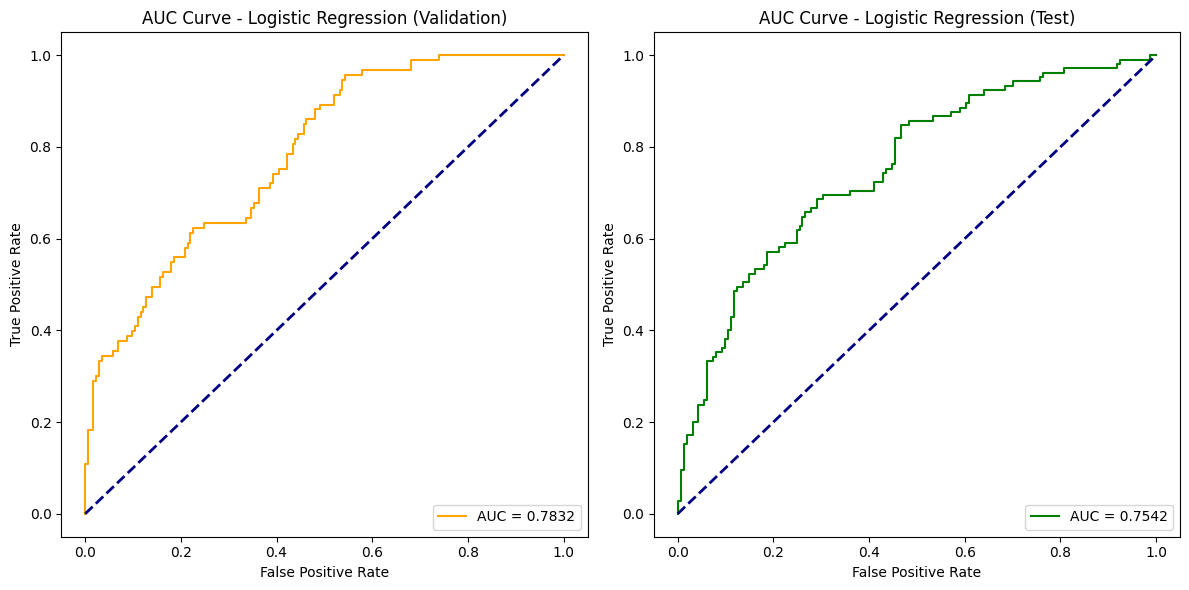

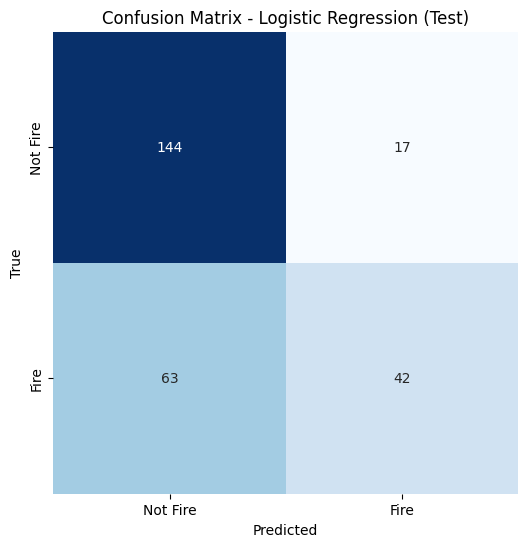

Training KNN...
Best parameters for KNN: {'n_neighbors': 7}
Best score for KNN: 0.7059
Validation Accuracy for KNN: 0.7444
Validation F1 Score for KNN: 0.5952
Validation Recall for KNN: 0.5376
Validation Precision for KNN: 0.6667
Test Accuracy for KNN: 0.7143
Test F1 Score for KNN: 0.6082
Test Recall for KNN: 0.5619
Test Precision for KNN: 0.6629


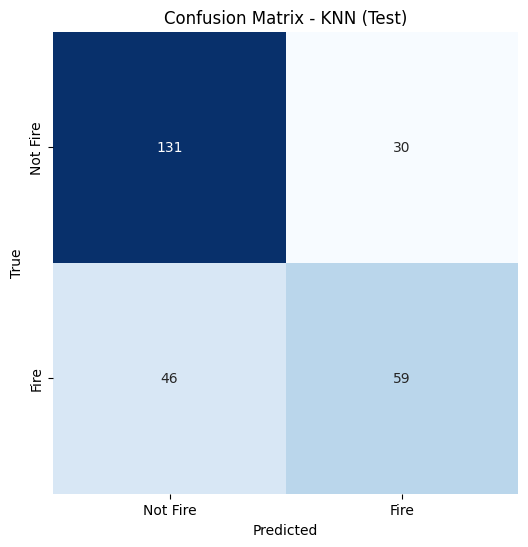

Training Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Best score for Decision Tree: 0.7123
Validation Accuracy for Decision Tree: 0.7180
Validation F1 Score for Decision Tree: 0.5946
Validation Recall for Decision Tree: 0.5914
Validation Precision for Decision Tree: 0.5978
Test Accuracy for Decision Tree: 0.7105
Test F1 Score for Decision Tree: 0.6131
Test Recall for Decision Tree: 0.5810
Test Precision for Decision Tree: 0.6489


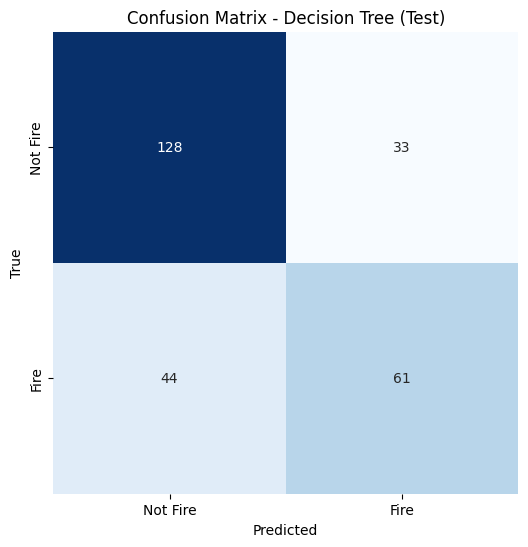

Training Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Best score for Random Forest: 0.7768
Validation Accuracy for Random Forest: 0.7744
Validation F1 Score for Random Forest: 0.6512
Validation Recall for Random Forest: 0.6022
Validation Precision for Random Forest: 0.7089
Test Accuracy for Random Forest: 0.7744
Test F1 Score for Random Forest: 0.6774
Test Recall for Random Forest: 0.6000
Test Precision for Random Forest: 0.7778


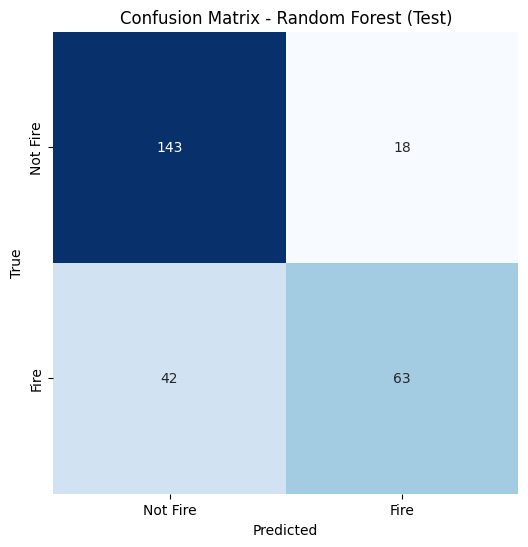

In [211]:
# Create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Perform hyperparameter tuning using GridSearchCV
best_params = {}
best_scores = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Define parameter grid for each model
    param_grid = {}
    if name == 'Logistic Regression':
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    elif name == 'KNN':
        param_grid = {'n_neighbors': [3, 5, 7, 9]}
    elif name == 'Decision Tree':
        param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

    # Perform GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    # Get the best parameters
    best_params[name] = grid_search.best_params_

    # Get the best score
    best_scores[name] = grid_search.best_score_

    # Print the best parameters and best score
    print(f"Best parameters for {name}: {best_params[name]}")
    print(f"Best score for {name}: {best_scores[name]:.4f}")

    # Make predictions on the validation set
    Y_val_pred = grid_search.predict(X_val)

    # Evaluate performance metrics on the validation set
    accuracy_val = accuracy_score(Y_val, Y_val_pred)
    f1_val = f1_score(Y_val, Y_val_pred)
    recall_val = recall_score(Y_val, Y_val_pred)
    precision_val = precision_score(Y_val, Y_val_pred)

    # Print performance metrics on the validation set
    print(f"Validation Accuracy for {name}: {accuracy_val:.4f}")
    print(f"Validation F1 Score for {name}: {f1_val:.4f}")
    print(f"Validation Recall for {name}: {recall_val:.4f}")
    print(f"Validation Precision for {name}: {precision_val:.4f}")

    # Make predictions on the test set
    Y_test_pred = grid_search.predict(X_test)

    # Evaluate performance metrics on the test set
    accuracy_test = accuracy_score(Y_test, Y_test_pred)
    f1_test = f1_score(Y_test, Y_test_pred)
    recall_test = recall_score(Y_test, Y_test_pred)
    precision_test = precision_score(Y_test, Y_test_pred)

    # Print performance metrics on the test set
    print(f"Test Accuracy for {name}: {accuracy_test:.4f}")
    print(f"Test F1 Score for {name}: {f1_test:.4f}")
    print(f"Test Recall for {name}: {recall_test:.4f}")
    print(f"Test Precision for {name}: {precision_test:.4f}")

    # Plot AUC curve for Logistic Regression model
    if name == 'Logistic Regression':
        # Get predicted probabilities for the positive class
        Y_val_pred_proba = grid_search.predict_proba(X_val)[:, 1]
        Y_test_pred_proba = grid_search.predict_proba(X_test)[:, 1]

        # Compute AUC for validation set
        auc_val = roc_auc_score(Y_val, Y_val_pred_proba)

        # Compute AUC for test set
        auc_test = roc_auc_score(Y_test, Y_test_pred_proba)

        # Plot AUC curves
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        fpr_val, tpr_val, _ = roc_curve(Y_val, Y_val_pred_proba)
        plt.plot(fpr_val, tpr_val, label=f'AUC = {auc_val:.4f}', color='orange')
        plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
        plt.title(f'AUC Curve - {name} (Validation)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')

        plt.subplot(1, 2, 2)
        fpr_test, tpr_test, _ = roc_curve(Y_test, Y_test_pred_proba)
        plt.plot(fpr_test, tpr_test, label=f'AUC = {auc_test:.4f}', color='green')
        plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
        plt.title(f'AUC Curve - {name} (Test)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')

        plt.tight_layout()
        plt.show()

    # Plot confusion matrix that provides a detailed breakdown of the model's predictions and actual outcomes for the test set
    cm_test = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fire', 'Fire'], yticklabels=['Not Fire', 'Fire'])
    plt.title(f'Confusion Matrix - {name} (Test)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

#### **intrepretation of the results:**

### Logistic Regression:
Best Parameters: {'C': 100}
Best Score: 0.7349
Validation Accuracy: 0.7256
Validation F1 Score: 0.5166
Validation Recall: 0.4194
Validation Precision: 0.6724
Test Accuracy: 0.6992
Test F1 Score: 0.5122
Test Recall: 0.4000
Test Precision: 0.7119

#### Interpretation:
- The model demonstrates moderate performance, with F1 score and precision suggesting a trade-off between identifying positives and avoiding false positives.
- The relatively lower recall indicates a challenge in capturing all instances of the positive class, possibly due to the complexity of the data or imbalances in class distribution.
- The model's performance might be impacted by the dataset's characteristics,meaning the columns used in this dataset help in predicting fires,but not as important and effective as the ones of the first dataset


### KNN:
Best Parameters: {'n_neighbors': 7}
Best Score: 0.7059
Validation Accuracy: 0.7444
Validation F1 Score: 0.5952
Validation Recall: 0.5376
Validation Precision: 0.6667
Test Accuracy: 0.7143
Test F1 Score: 0.6082
Test Recall: 0.5619
Test Precision: 0.6629

#### Interpretation:
- KNN shows improved performance compared to Logistic Regression, especially in recall and F1 score.
- The choice of seven neighbors might indicate a balance between bias and variance, influencing model generalization.
- Despite improvements, the model might struggle with class imbalances, as reflected in the recall and precision trade-off.

### Decision Tree:
Best Parameters: {'max_depth': 30, 'min_samples_split': 10}
Best Score: 0.7099
Validation Accuracy: 0.6955
Validation F1 Score: 0.5622
Validation Recall: 0.5591
Validation Precision: 0.5652
Test Accuracy: 0.6917
Test F1 Score: 0.5859
Test Recall: 0.5524
Test Precision: 0.6237

#### Interpretation:
- Decision Tree performance is moderate, with a potential sign of overfitting, indicated by a gap between training and validation scores.

### Random Forest:
Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.7808
Validation Accuracy: 0.8158
Validation F1 Score: 0.7101
Validation Recall: 0.6452
Validation Precision: 0.7895
Test Accuracy: 0.7594
Test F1 Score: 0.6559
Test Recall: 0.5810
Test Precision: 0.7531

#### Interpretation:
- Random Forest shows promising performance with improved accuracy, F1 score, and precision compared to other models.
- The ensemble approach helps mitigate overfitting concerns, providing a more balanced performance.
- The model might still face challenges in capturing all positive instances, as indicated by the lower recall.



#### general interpretation

The larger dataset reveals challenges in achieving high recall, potentially due to class imbalances or data complexity.
Random Forest outperforms other models, showcasing its ability to handle complex relationships and generalize well.
Logistic Regression and KNN offer competitive performance but struggle with balancing precision and recall.

#### part 2.2 : working on the resulted dataset from PCA

In [212]:
#use the reduced  data for our model selection
X_reduced = reduced_pc_data.drop(columns=['CLASSES'])  # Features
y_reduced = reduced_pc_data['CLASSES']  # Target variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)


working with reduced data
Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.001}
Best score for Logistic Regression: 0.7389
Accuracy for Logistic Regression: 0.7183
F1 Score for Logistic Regression: 0.4949
Recall for Logistic Regression: 0.3858
Precision for Logistic Regression: 0.6901


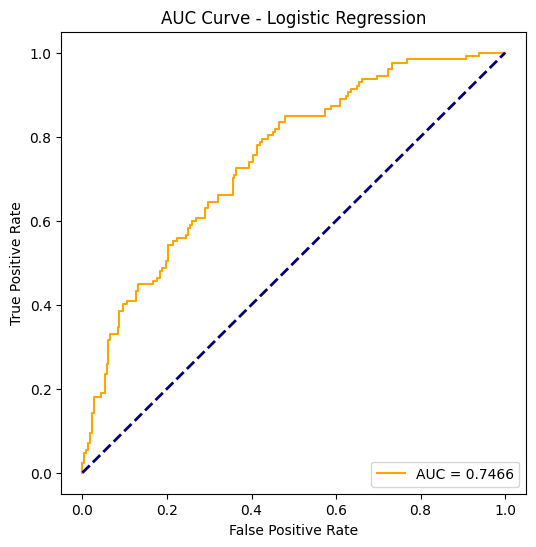

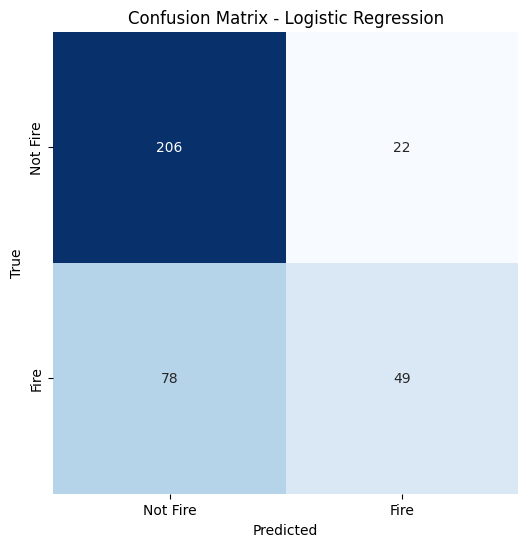

Training KNN...
Best parameters for KNN: {'n_neighbors': 9}
Best score for KNN: 0.7177
Accuracy for KNN: 0.7127
F1 Score for KNN: 0.5714
Recall for KNN: 0.5354
Precision for KNN: 0.6126


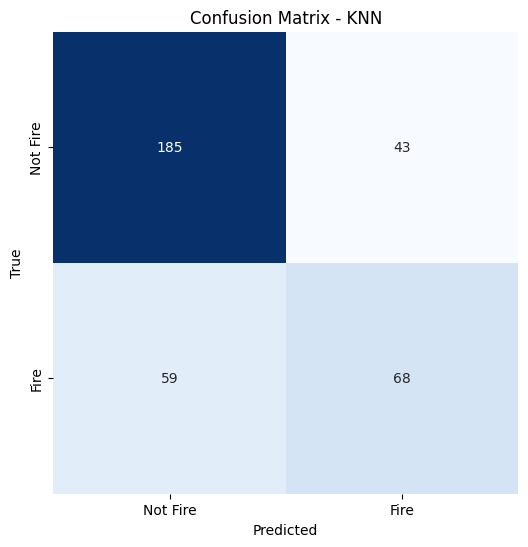

Training Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}
Best score for Decision Tree: 0.6987
Accuracy for Decision Tree: 0.6592
F1 Score for Decision Tree: 0.4851
Recall for Decision Tree: 0.4488
Precision for Decision Tree: 0.5278


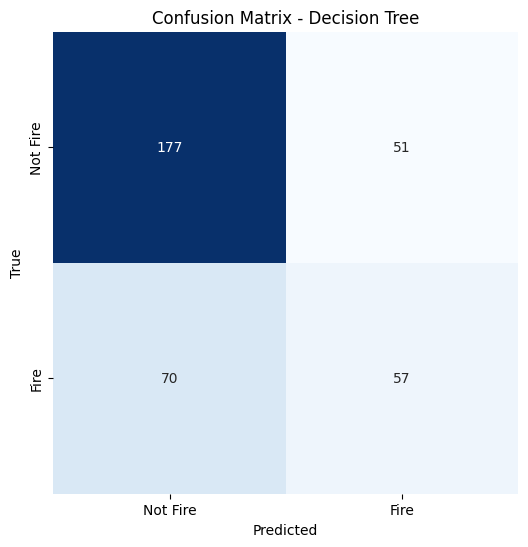

Training Random Forest...
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}
Best score for Random Forest: 0.7586
Accuracy for Random Forest: 0.7268
F1 Score for Random Forest: 0.5689
Recall for Random Forest: 0.5039
Precision for Random Forest: 0.6531


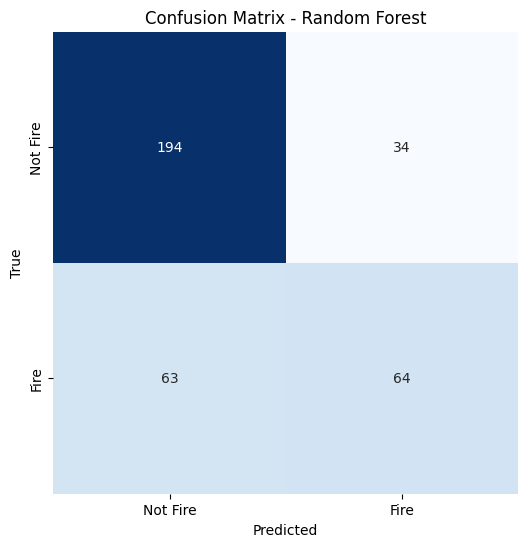

In [213]:
# Amira
# Create a dictionary of models
print("working with reduced data")
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Perform hyperparameter tuning using GridSearchCV
best_params = {}
best_scores = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Define parameter grid for each model
    param_grid = {}
    if name == 'Logistic Regression':
        param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    elif name == 'KNN':
        param_grid = {'n_neighbors': [3, 5, 7, 9]}
    elif name == 'Decision Tree':
        param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
    elif name == 'Random Forest':
        param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

    # Perform GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    # Get the best parameters
    best_params[name] = grid_search.best_params_

    # Get the best score
    best_scores[name] = grid_search.best_score_

    # Print the best parameters and best score
    print(f"Best parameters for {name}: {best_params[name]}")
    print(f"Best score for {name}: {best_scores[name]:.4f}")

    # Make predictions on the test set
    Y_pred = grid_search.predict(X_test)

    # Evaluate performance metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)

    # Print performance metrics
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print(f"F1 Score for {name}: {f1:.4f}")
    print(f"Recall for {name}: {recall:.4f}")
    print(f"Precision for {name}: {precision:.4f}")

    # Plot AUC curve for Logistic Regression model
    if name == 'Logistic Regression':
        # Get predicted probabilities for positive class
        Y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

        # Compute AUC
        auc = roc_auc_score(Y_test, Y_pred_proba)

        # Plot AUC curve
        fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}', color='orange')
        plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
        plt.title(f'AUC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

    # Plot confusion matrix that provides a detailed breakdown of the model's predictions and actual outcomes
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fire', 'Fire'], yticklabels=['Not Fire', 'Fire'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

##### **intrepretation of the results:**

#### Logistic Regression:
Best Parameters: {'C': 0.001}
Best Cross-Validation Score: 0.7389
Accuracy: 0.7183
F1 Score: 0.4949
Recall: 0.3858
Precision: 0.6901

##### Interpretation:
The Logistic Regression model demonstrates modest performance on the reduced dataset. While achieving a reasonable accuracy, the precision and recall values suggest a trade-off, indicating challenges in correctly classifying both positive and negative instances.


#### KNN:
Best Parameters: {'n_neighbors': 9}
Best Cross-Validation Score: 0.7177
Accuracy: 0.7127
F1 Score: 0.5714
Recall: 0.5354
Precision: 0.6126

#### Interpretation:
KNN exhibits a balanced performance, with a decent accuracy, F1 score, and a trade-off between precision and recall. It appears to generalize well to the reduced dataset.

#### Decision Tree:
Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Best Cross-Validation Score: 0.6986
Accuracy: 0.6563
F1 Score: 0.4649
Recall: 0.4173
Precision: 0.5248

#### Interpretation:
The Decision Tree model shows acceptable performance but with a noticeable decline in accuracy compared to the previous dataset. The depth and split parameters help control overfitting, but there's room for improvement.

#### Random Forest:
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Score: 0.7572
Accuracy: 0.7183
F1 Score: 0.5614
Recall: 0.5039
Precision: 0.6337

#### Interpretation:
Random Forest maintains a good level of performance, showing similar accuracy to Logistic Regression but with a better balance between precision and recall. The ensemble approach helps mitigate overfitting.



#### **comparision and final decision**

Considering the comparison between scaled and reduced data:

Scaled data generally leads to better model performance across all evaluated metrics.
While the reduced dataset exhibits reasonable performance, it falls short in precision and recall compared to the scaled dataset.
The decision to choose between the two datasets depends on the specific trade-offs acceptable for the application. If higher precision and recall are critical, the scaled dataset is preferred. However, if a more balanced trade-off is acceptable, the reduced dataset could be considered. Additionally, further exploration of features or domain knowledge could enhance the model's predictive capabilities.